# Global Power Plant Database

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:
    
    • `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    • `country_long` (text): longer form of the country designation
    • `name` (text): name or title of the power plant, generally in Romanized form
    • `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    • `capacity_mw` (number): electrical generating capacity in megawatts
    • `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    • `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    • `primary_fuel` (text): energy source used in primary electricity generation or export
    • `other_fuel1` (text): energy source used in electricity generation or export
    • `other_fuel2` (text): energy source used in electricity generation or export
    • `other_fuel3` (text): energy source used in electricity generation or export
    •  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    • `owner` (text): majority shareholder of the power plant, generally in Romanized form
    • `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    • `url` (text): web document corresponding to the `source` field
    • `geolocation_source` (text): attribution for geolocation information
    • `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    • `year_of_capacity_data` (number): year the capacity information was reported
    • `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    • `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    • `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    • `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    • `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    • `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    • `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    • `generation_data_source` (text): attribution for the reported generation information
    • `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    • `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    • `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    • `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    • `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    • 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    • `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    • `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    • `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    • `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
        
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

## Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn 
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

power_plant = pd.read_csv('Global_Power_Plant_Database_IND.csv',skipinitialspace=True)
power_plant.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

# Exploratory Data Analysis (EDA)

## Data Pre Processing

In [4]:
# Checking the dimension of the dataset

power_plant.shape

(907, 27)

In [5]:
# Checking columns present in the dataset

power_plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
# checking the information of the dataset

power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
# Checking the null values present in the dataset

power_plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
# Checking the null/missing ratio of the dataset

Gp = (power_plant.isnull().sum()/len(power_plant)*100).sort_values(ascending=False)
Gp

estimated_generation_gwh    100.000000
other_fuel3                 100.000000
wepp_id                     100.000000
generation_gwh_2013         100.000000
generation_gwh_2019         100.000000
other_fuel2                  99.889746
other_fuel1                  78.169791
owner                        62.293275
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_data_source       50.496141
year_of_capacity_data        42.778390
commissioning_year           41.896362
latitude                      5.071665
longitude                     5.071665
geolocation_source            2.094818
country                       0.000000
url                           0.000000
country_long                  0.000000
primary_fuel                  0.000000
capacity_mw                   0.000000
gppd_idnr                     0.000000
name                     

In [9]:
# Checking the unique value present in the dataset

power_plant.nunique().sort_values(ascending=False)

name                        907
gppd_idnr                   907
latitude                    836
longitude                   827
generation_gwh_2018         410
generation_gwh_2017         408
generation_gwh_2016         403
generation_gwh_2015         396
generation_gwh_2014         371
capacity_mw                 361
url                         304
owner                       280
source                      191
commissioning_year           73
primary_fuel                  8
other_fuel1                   3
geolocation_source            3
generation_data_source        1
country                       1
year_of_capacity_data         1
country_long                  1
other_fuel2                   1
generation_gwh_2013           0
wepp_id                       0
other_fuel3                   0
generation_gwh_2019           0
estimated_generation_gwh      0
dtype: int64

In [10]:
# Dropping features with more than 70% of null values

power_plant.drop(['estimated_generation_gwh','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019',
                 'other_fuel2','other_fuel1'],axis=1,inplace=True)
power_plant.shape

(907, 20)

In [11]:
# Checking the value count of Capacity_mw

pd.set_option('display.max_rows',None)
power_plant['capacity_mw'].value_counts()

5.000       39
10.000      22
600.000     20
15.000      20
1200.000    19
20.000      18
1.000       18
30.000      16
50.000      15
100.000     14
60.000      13
500.000     12
300.000     11
24.000      11
25.000      11
120.000     10
16.000       9
36.000       9
1000.000     9
3.000        8
12.000       8
40.000       8
6.000        8
9.000        8
10.500       7
1320.000     7
250.000      7
50.400       7
90.000       7
75.000       7
240.000      7
16.500       6
2.000        6
21.000       6
150.000      6
4.000        6
270.000      5
35.000       5
18.000       5
45.000       5
22.500       5
22.000       5
750.000      4
11.200       4
80.000       4
1500.000     4
540.000      4
25.500       4
630.000      4
440.000      4
125.000      4
330.000      4
26.000       4
96.000       4
1050.000     4
2000.000     4
135.000      4
1340.000     4
6.600        3
4.500        3
28.000       3
160.000      3
420.000      3
800.000      3
1980.000     3
180.000      3
46.000    

In [12]:
# Checking the value count of Capacity_mw

power_plant['primary_fuel'].value_counts() 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
# Splitting the dataset by 'Categorical' and 'Numerical' based on data types

power_plant_cat = []
for i in power_plant.columns:
    if power_plant.dtypes[i] == 'object':
        power_plant_cat.append(i)
        
power_plant_num=[]
for i in power_plant.columns:
    if power_plant.dtypes[i] != 'object':
        power_plant_num.append(i)
        
print('Categorical Columns',power_plant_cat)
print('Numerical Columns',power_plant_num)


Categorical Columns ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
Numerical Columns ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [14]:
power_plant.sample(3)

country country_long                                 name   gppd_idnr  \
428     IND        India                         LOWER JHELUM  IND0000235   
36      IND        India  Askandra - Newton Solar Power Plant  WRI1026110   
906     IND        India              iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
428        105.0   34.2189    74.5281        Hydro              1978.0   
36           5.0   27.3537    71.6917        Solar                 NaN   
906         16.5    9.9344    77.4768         Wind                 NaN   

                            owner                         source  \
428                           NaN  Central Electricity Authority   
36   Newton Solar Private Limited                      Lancosola   
906            iEnergy Wind Farms                            CDM   

                                                   url geolocation_source  \
428                             http://www.cea.nic.in/                WRI   
36   http://www.lancosolar.com/pdfs/rajasthan-pv-pr...     Industry About   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...                WRI   

     year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
428                 2019.0            597.86565            662.87895   
36                     NaN                  NaN                  NaN   
906                    NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
428            480.73425            478.58505            586.38335   
36                   NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

            generation_data_source  
428  Central Electricity Authority  
36                             NaN  
906                            NaN

### Observations

Imported required libraries for processing the dataset

Dataset contains 907 rows and 27 columns

Data types present in the datasets are float – 15 and object – 12

Power plants present in the dataset are from India 

Null values are present in the features latitude, longitude, other_fuel1, other_fuel2, other_fuel3,
commissioning_year, owner, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,
generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source and 
estimated_generation_gwh

Features with no null values are country, country_long, name, gppd_idnr, capacity_mw, primary_fuel, source and url

Features with more than 70% missing ratio are estimated_generation_gwh,  other_fuel3,  wepp_id, 
generation_gwh_2013,  generation_gwh_2019, other_fuel2 and other_fuel1

Dropping the features with more than 70% of null values/missing ratio from the dataset

Dimension of the dataset is 907 rows with 20 columns, after dropping the features with 70% null values/missing ratio 

Features with null values between 50% to 70% and with unique values of 100%  are kept for further analysis 

Power plant with capacity of 5 megawatts count is maximum with 39 across the country, followed
by 10 megawatts with 22 count, 600 and 15 megawatts with 20 count 

Top 3 primary fuels used by power plant to generate electricity are Coal with 258 count , Hydro with 251 and Solar with 127

Splitted the dataset by 'Categorical' and 'Numerical' based on data types 

# Data Visualization

## Univariate Analysis

<AxesSubplot:>

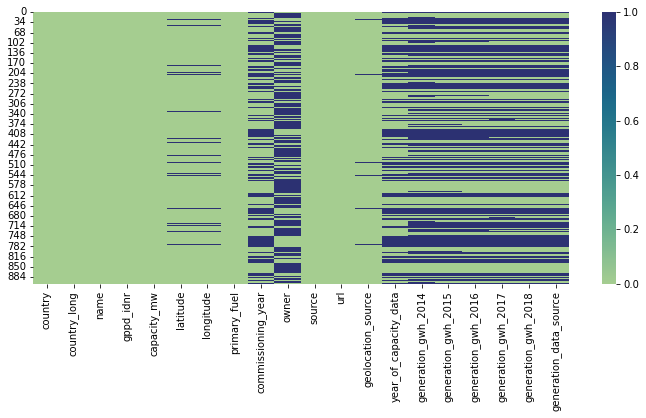

In [15]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(power_plant.isnull(),cmap="crest")

### Obbservations:
    
Above heatmap shows null values present in the dataset

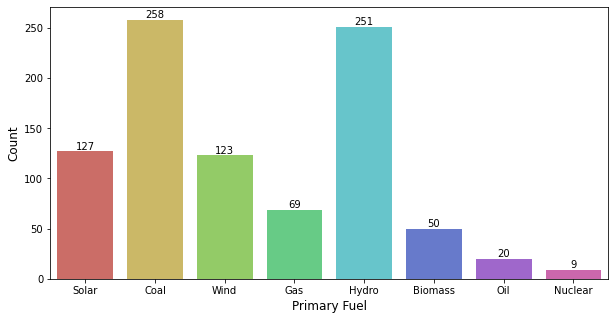

In [16]:
# Visualizing feature 'primary_fuel' with countplot

plt.figure(figsize=(10,5))
ab = sns.countplot(power_plant['primary_fuel'],palette="hls")
plt.xlabel('Primary Fuel',fontsize = 12)
plt.ylabel('Count',fontsize=12)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

### Observations:
    
Power plants which uses 'Coal' as the primary fuel has the maximum count of 258 across the country 

'Hydro' is the second used primary fuel with 251 power plants and 'Solar' at third with 127 power plants in India.

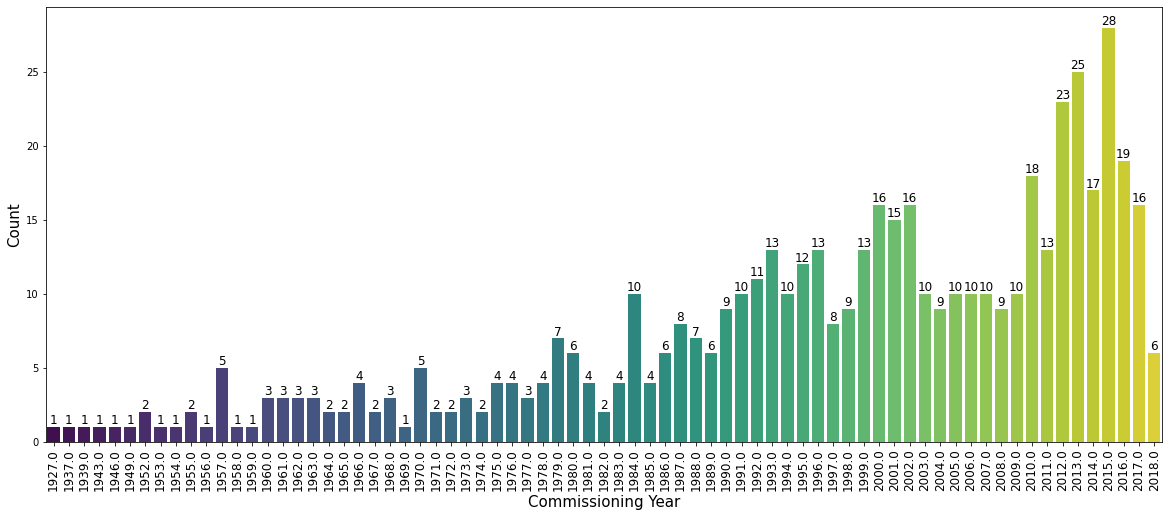

In [17]:
# Visualizing feature 'commissioning_year' with countplot

plt.figure(figsize=(20,8))
ab = sns.countplot(power_plant['commissioning_year'],palette="viridis")
plt.xlabel('Commissioning Year',fontsize = 15)
plt.xticks(rotation = 90,fontsize=12)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

### Observation

With the available dataset we can observe that maximum count of 28 power plants has been commissioned in the year 2015
with 28 power plants, followed by 25 power plants in the year 2013 and 23 power plants at 2012

Data may vary if we have the complete details of all the power plants commissioning year 

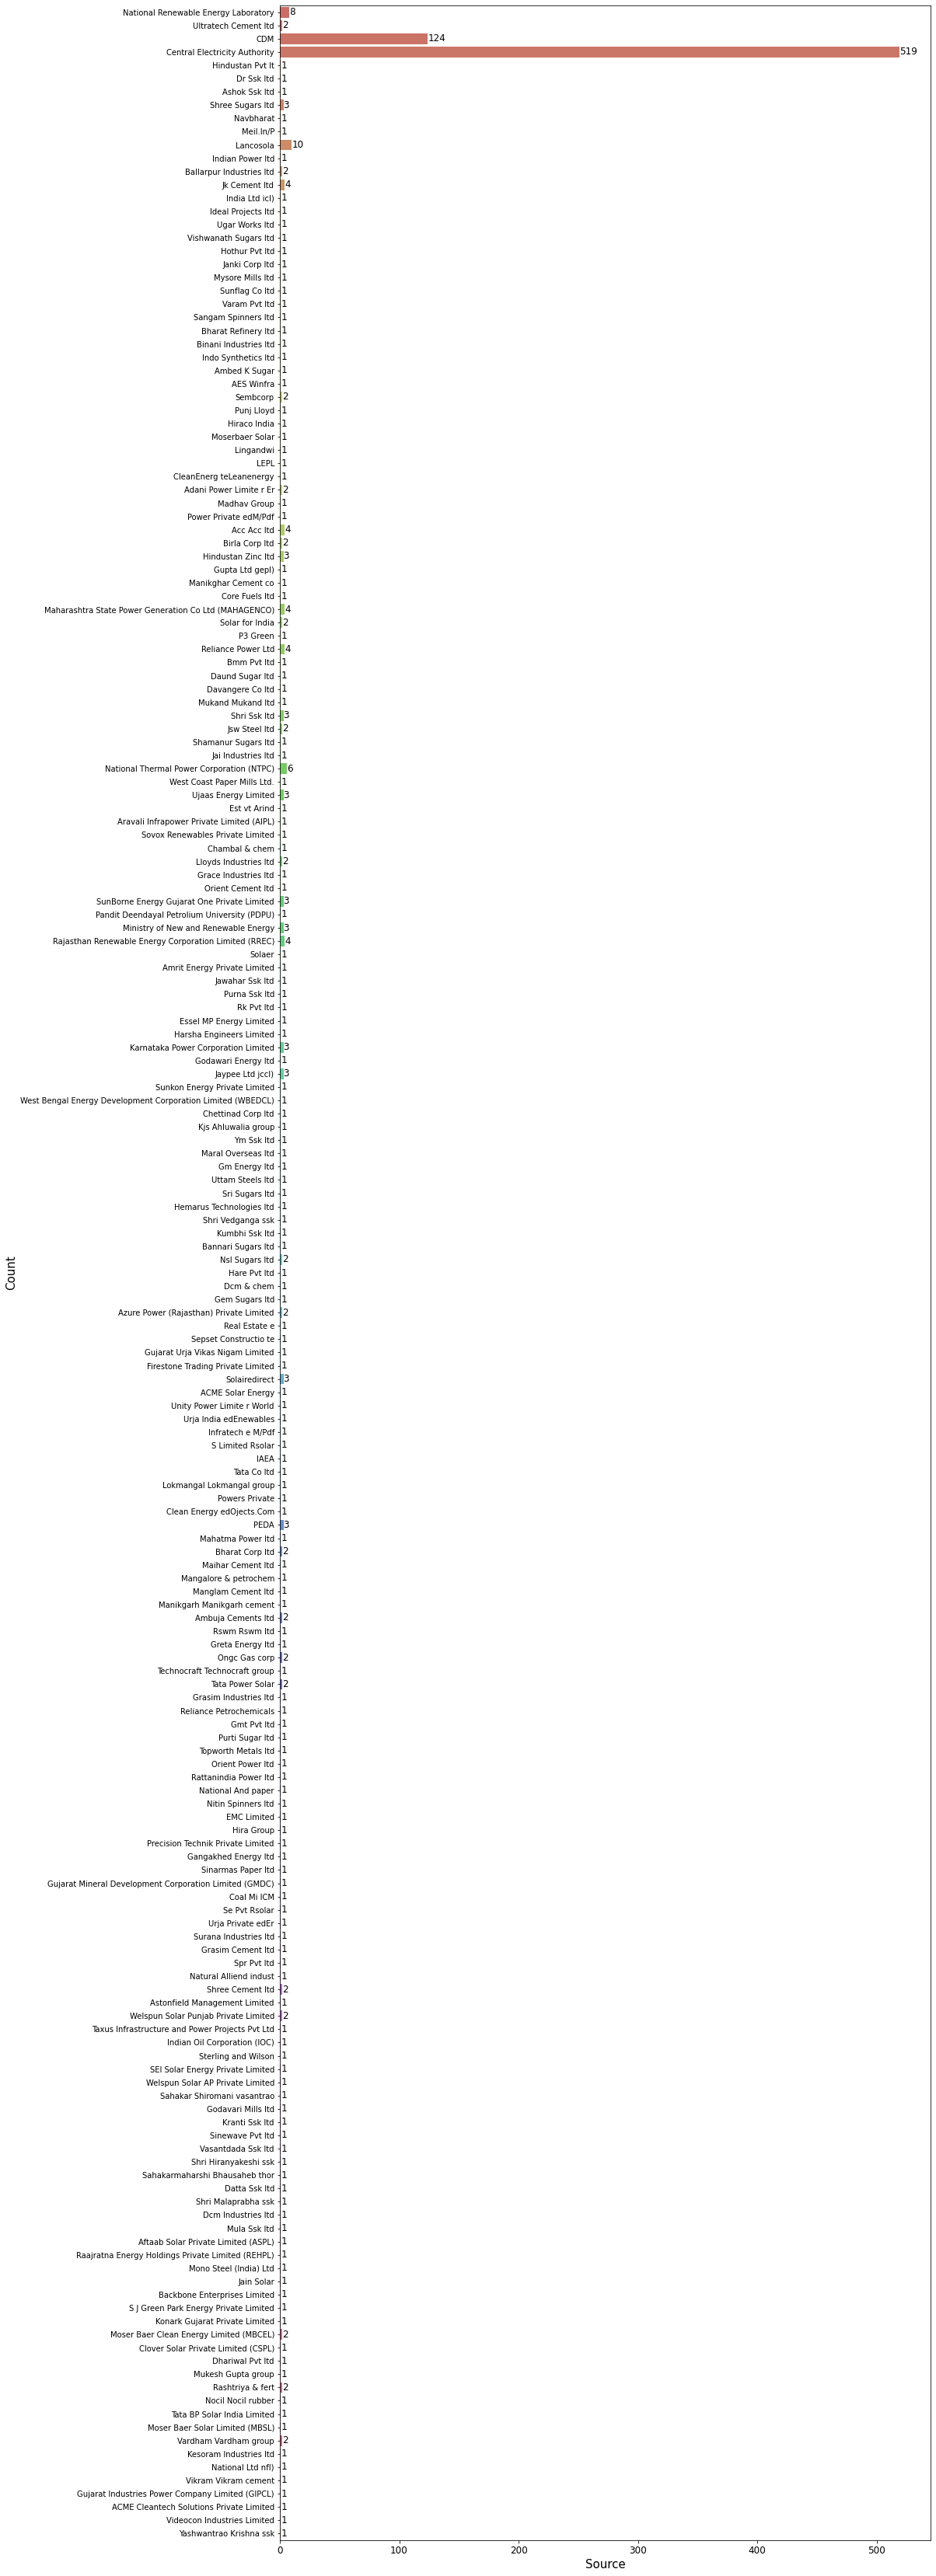

In [18]:
# Visualizing feature 'source' with countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=power_plant['source'],palette="hls")
plt.xlabel('Source',fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

### Observation

More than 50% of the data source are reported by Central Electricity Authority

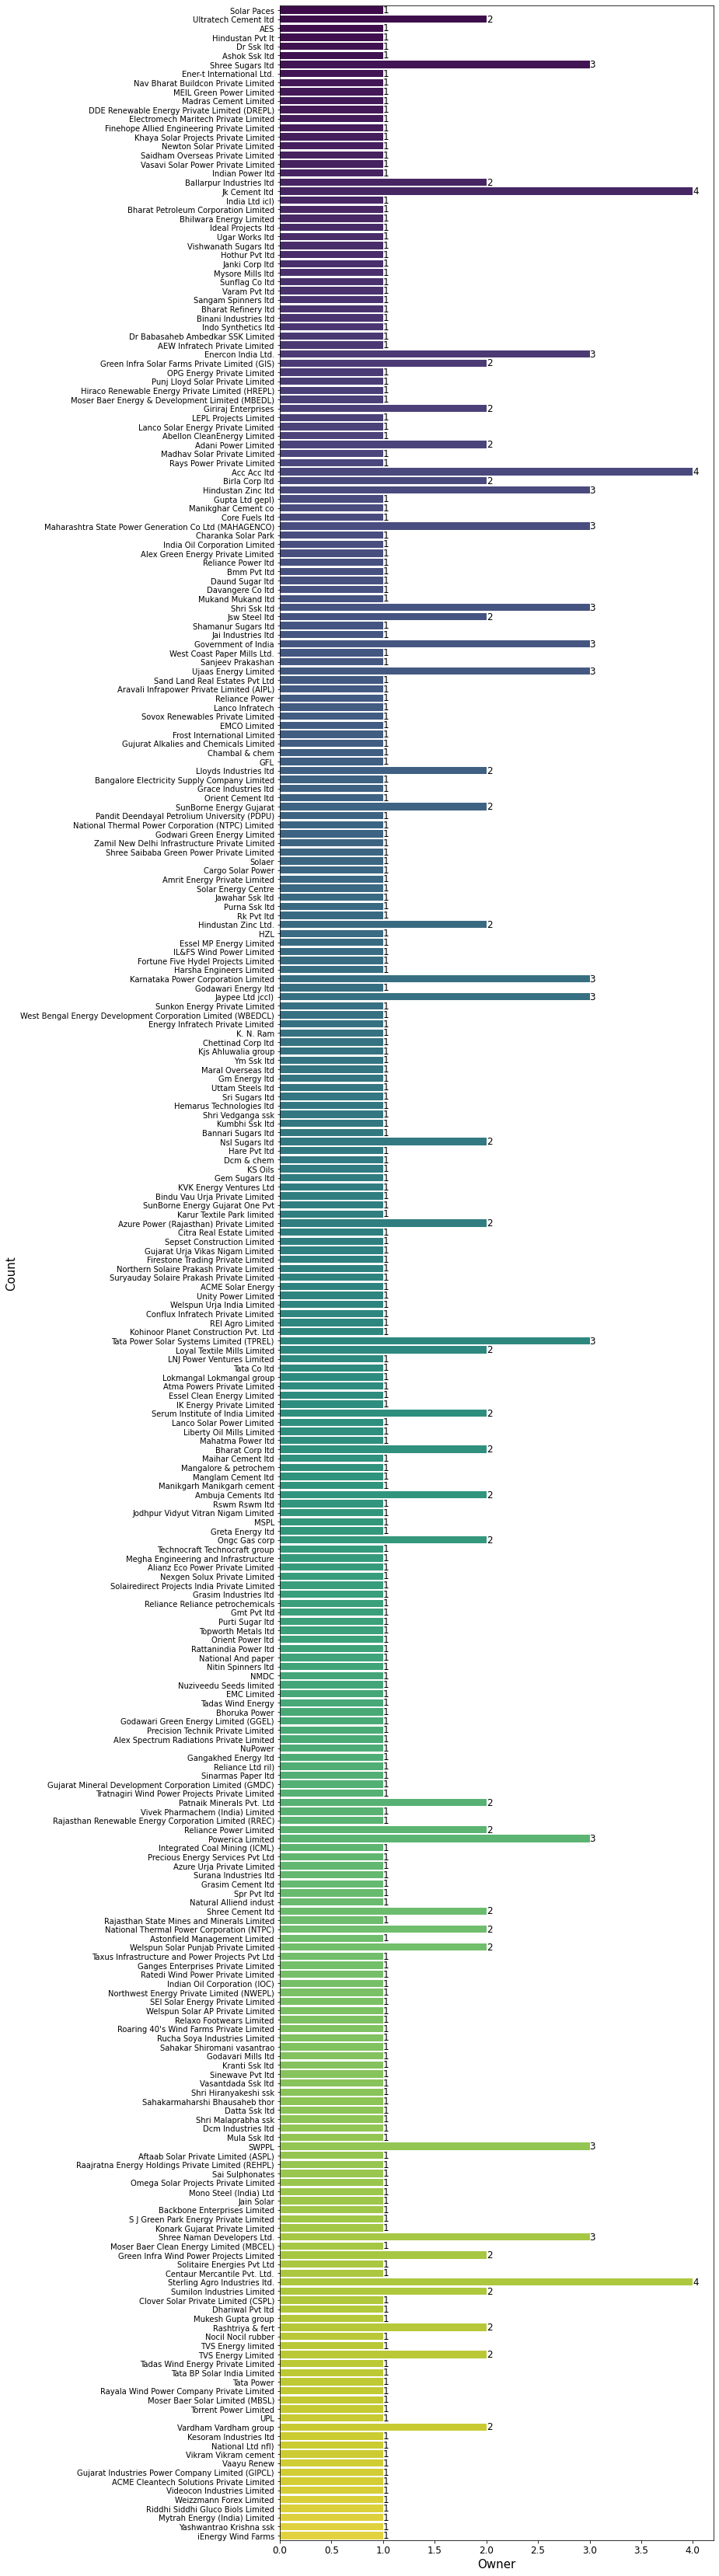

In [19]:
# Visualizing feature 'owner' with countplot

plt.figure(figsize=(10,60))
ab = sns.countplot(y=power_plant['owner'],palette="viridis")
plt.xlabel('Owner',fontsize = 15)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

### Observations

Based on the available data we can observe Acc Acc ltd, Sterling Agro Industries ltd and Jk Cement ltd each owns 4 power plants in India

SWPPL,Jaypee Ltd jccl,Karnataka Power Corporation Limited,Government of India,Enercon India Ltd,Shree Naman Developers Ltd,
Ujaas Energy Limited, Hindustan Zinc ltd,Powerica Limited,Shri Ssk ltd,Tata Power Solar Systems Limited (TPREL),Shree Sugars ltd
and Maharashtra State Power Generation Co Ltd (MAHAGENCO) each owns 3 power plants across the country


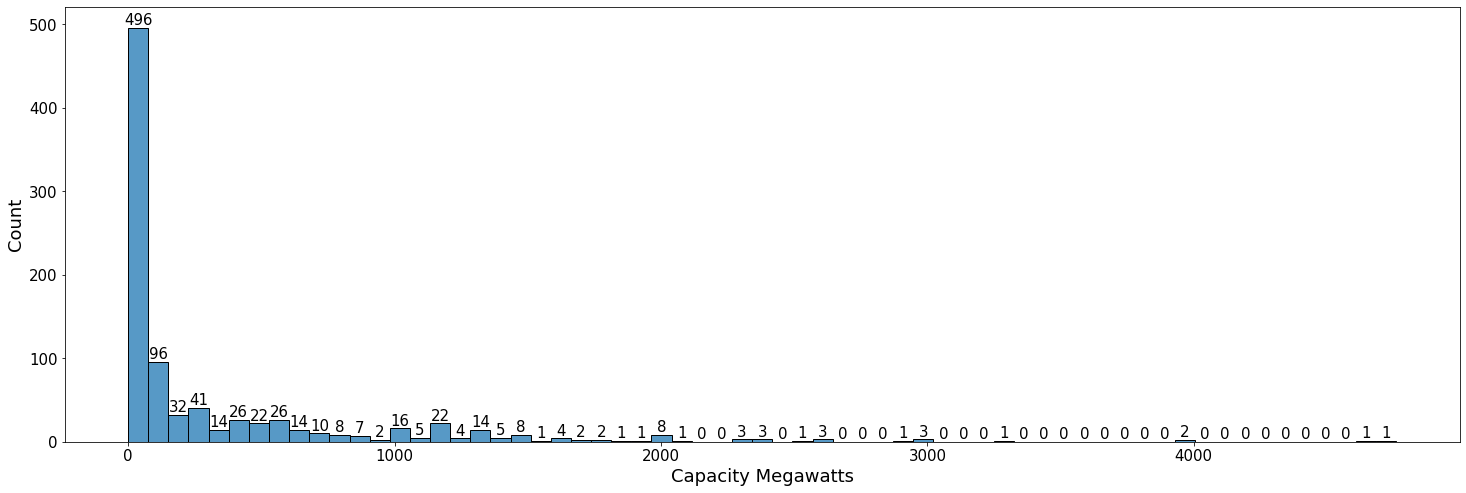

In [20]:
# Visualizing feature 'capacity_mw' with histplot

plt.figure(figsize=(25,8))
ab = sns.histplot(data = power_plant, x='capacity_mw',palette="hls")
plt.xlabel('Capacity Megawatts',fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=18)

for i in ab.containers:
    ab.bar_label(i,fontsize=15)

### Observations

Power Plants with capacity ranges from 5 to 1000 megawatts are maximum in India

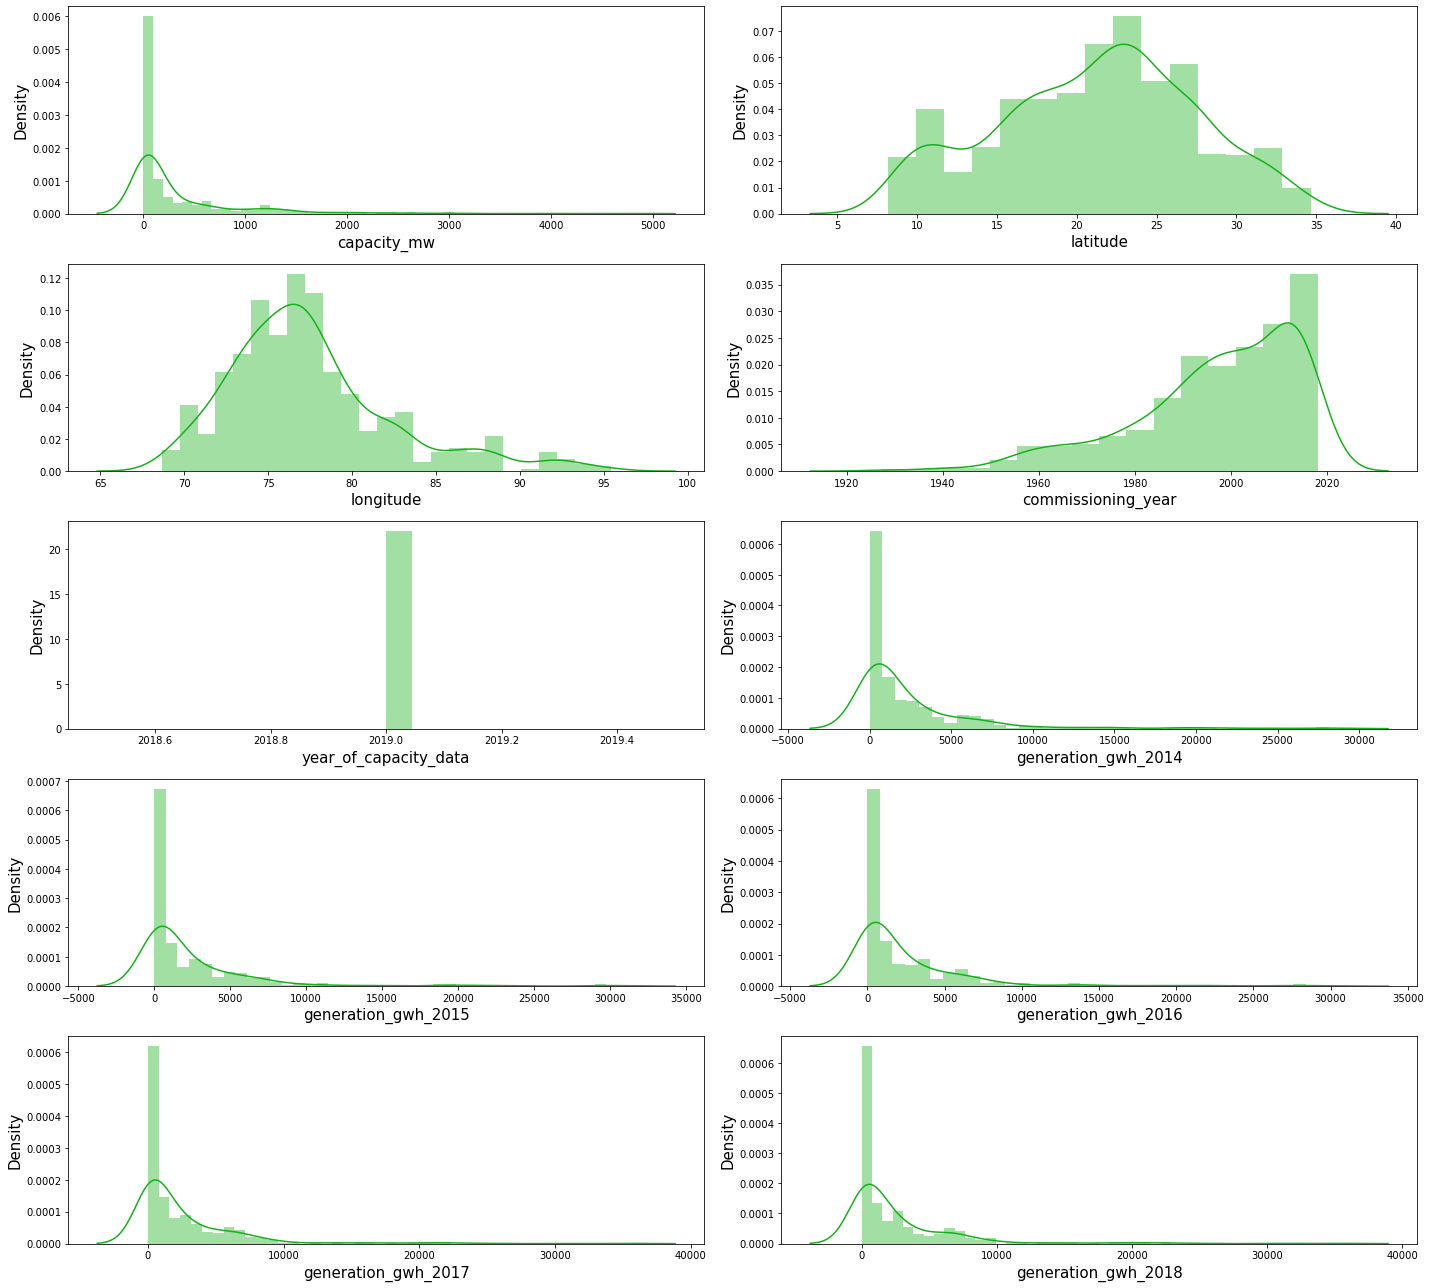

In [21]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(20,18))
plot_number=1
for i in power_plant_num:
    if plot_number <=10:
        ax=plt.subplot(5,2,plot_number)
        sns.distplot(power_plant[i],color='#15b01a')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observations

Based on distribution plot we can observe the following features capacity_mw,longitude, generation_gwh_2014, generation_gwh_2015,
generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are skewed towards right and commissioning_year is skewed towards left



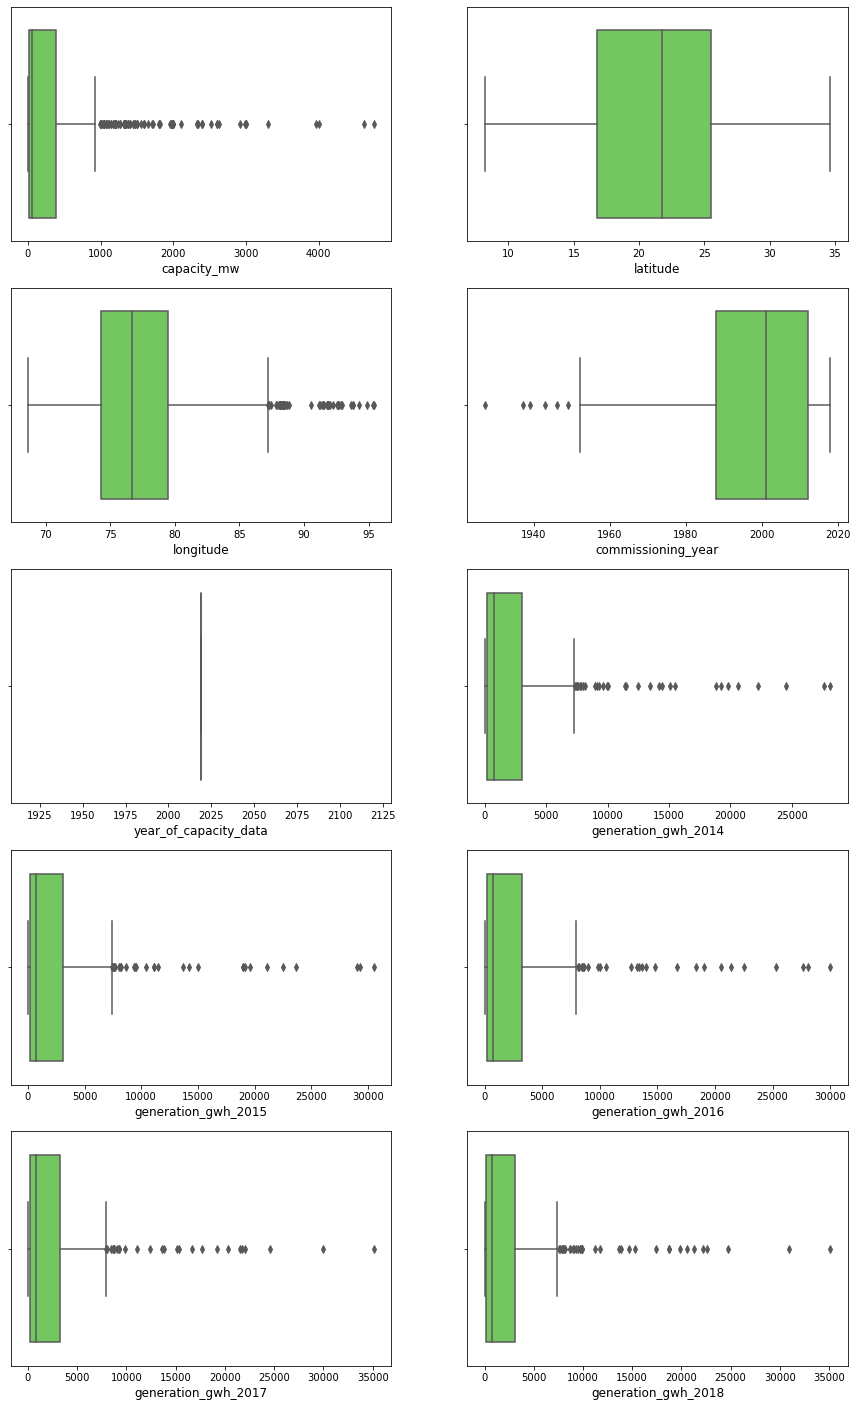

In [22]:
# Checking outliers with boxplot

plt.figure(figsize=(15,25))
plot_number=1
for i in power_plant_num:
    if plot_number <=10:
        ax=plt.subplot(5,2,plot_number)
        sns.boxplot( power_plant[i],color='#69d84f')
        plt.xlabel(i,fontsize=12)
    plot_number+=1
plt.show()

### Observation

Outliers are present in the features capacity_mw, longitude, commissioning_year, generation_gwh_2014, generation_gwh_2015,
generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018

## Bivariate and Multivariate Analysis

In [23]:
# Visualizing the location of Top 50 powerplants by Folium Map


power_plant_sort = power_plant.sort_values('capacity_mw', ascending=False)
top50 = power_plant_sort.head(50)
loc = folium.Map([21.1797,79.3978],zoom_start=5)

col = {'Coal':'black','Hydro':'blue','Solar':'green','Wind':'yellow','Gas':'orange','Biomass':'yellow','Oil':'red',
      'Nuclear':'red'}
for index, row in top50.iterrows():
    label = f'{row["name"]}"\n"Capacity_mw: {row["capacity_mw"]}"\n"Primary_fuel: {row["primary_fuel"]}"\n"'
    category = row['primary_fuel']
    color = col.get(category)
    icon = folium.Icon(color=color)
    folium.Marker(location=[row['latitude'], row['longitude']],popup=folium.Popup(row['capacity_mw']),
                 tooltip=label,icon=icon).add_to(loc)
                  
loc

### Observation

Above map showing the location of Top 50 power plants name based on their capacity_mw and primary fuel in India.

Based on the map we can observe Top 50 power plants based on their capacity uses 'Coal' as the primary fuel to generate or export
electricity

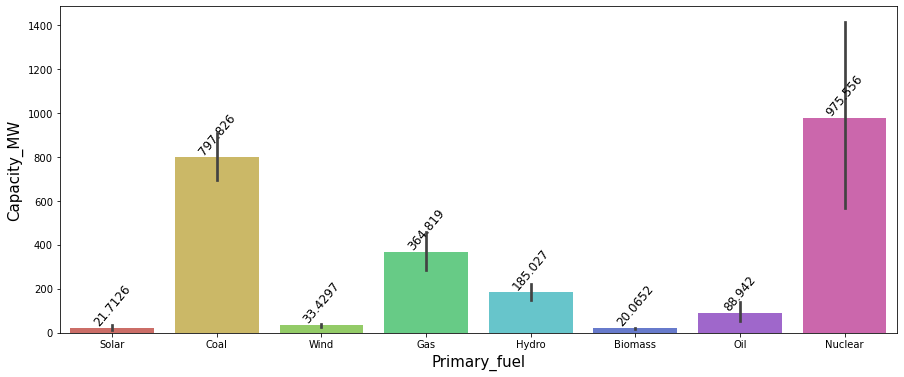

In [2579]:
# Comparing primary fuel with capacity_mw by lineplot

plt.figure(figsize=(15,6))
fx=sns.barplot(data =power_plant,x='primary_fuel',y='capacity_mw',palette="hls")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Capacity_MW',fontsize=15)
for i in fx.containers:
    fx.bar_label(i,fontsize=12,rotation=50)
plt.show()

### Observation

We can observe from above barplot, power plants which uses Nuclear as primary fuel has the maximum capacity of 975 megawatts to generate electricity
followed by power plants which uses Coal with 797 megawatts and power plants which uses gas with 364 megawatts of capacity

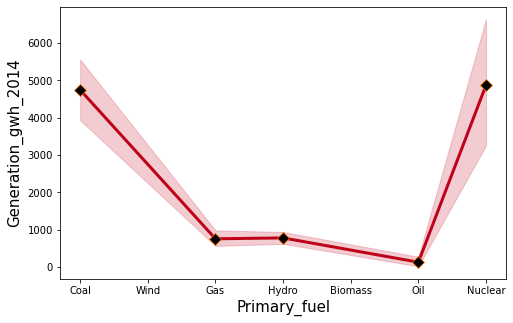

In [2580]:
# Comparing primary fuel with generation_gwh_2014 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data =power_plant,x='primary_fuel',y='generation_gwh_2014',color="#be0119",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2014',fontsize=15)
plt.show()

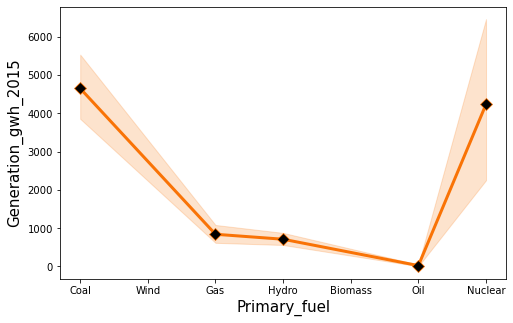

In [2581]:
# Comparing primary fuel with generation_gwh_2015 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = power_plant, x='primary_fuel', y='generation_gwh_2015',color="#f97306",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2015',fontsize=15)
plt.show()

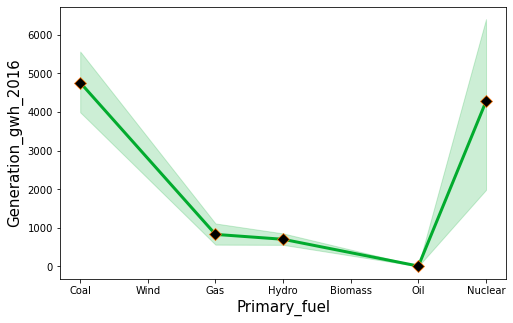

In [2582]:
# Comparing primary fuel with generation_gwh_2016 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = power_plant, x='primary_fuel', y='generation_gwh_2016',color="#02ab2e",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2016',fontsize=15)
plt.show()

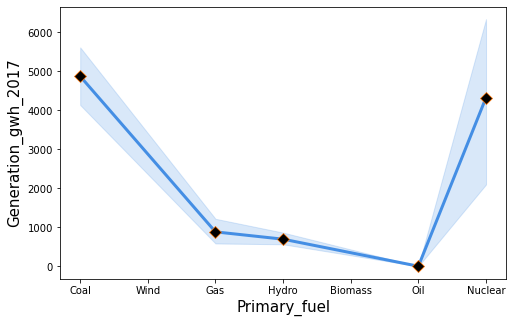

In [2583]:
# Comparing primary fuel with generation_gwh_2017 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = power_plant, x='primary_fuel', y='generation_gwh_2017',color="#448ee4",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2017',fontsize=15)
plt.show()

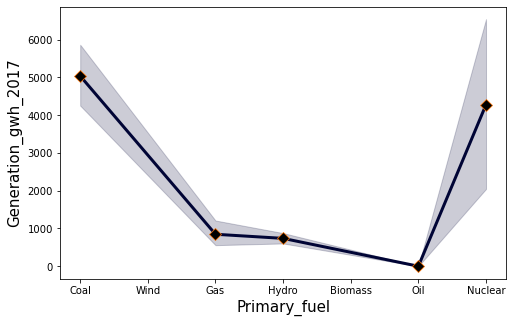

In [2584]:
# Comparing primary fuel with generation_gwh_2018 by lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data = power_plant, x='primary_fuel', y='generation_gwh_2018',color="#000435",
            linestyle = 'solid',linewidth=3,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Primary_fuel',fontsize=15)
plt.ylabel('Generation_gwh_2017',fontsize=15)
plt.show()

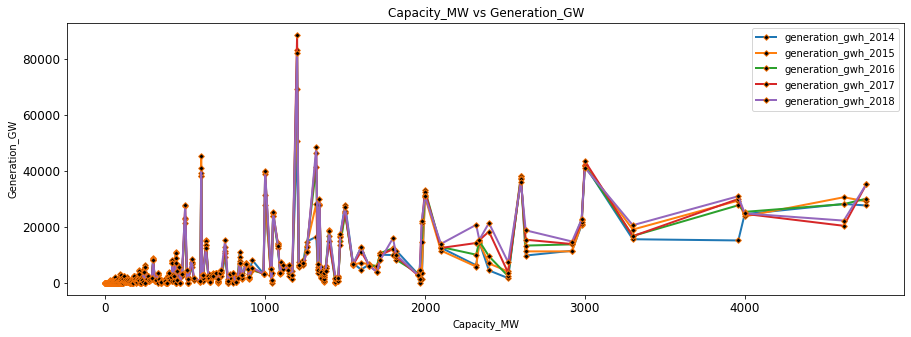

In [2585]:
# Comparing 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'
# with 'capacity_mw'


gen = power_plant[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
               'generation_gwh_2017','generation_gwh_2018']].groupby(power_plant['capacity_mw']).sum()
gen.plot(kind='line', fontsize=12,figsize=(15,5),
         linestyle = 'solid',linewidth=2,marker="D",markersize=4,markerfacecolor="k",markeredgecolor="#f97306")
plt.title("Capacity_MW vs Generation_GW")
plt.xlabel("Capacity_MW")
plt.ylabel("Generation_GW")
plt.show()

### Observations

With the available data we can observe, in 2014 Coal and Nuclear power plants produced maximum electricity by gigawatts

In 2015,2016,2017 and 2018 power plants which uses Coal produced maximum electricity followed by Nuclear, Gas and Hydro

capacity_mw Vs generation_gwh_2014,2015,2016,2017,2018, we can observe the count of power plants which has the capacity 
ranges from 5 to 2000 megawatts are high when compared with power plants which has above 2000 megawatts 

Generation of electricity increases when the capacity of power plant increases

Data may differ,as we dont have the complete details for Generation_gwh_2014,2015,2016,2017,2018

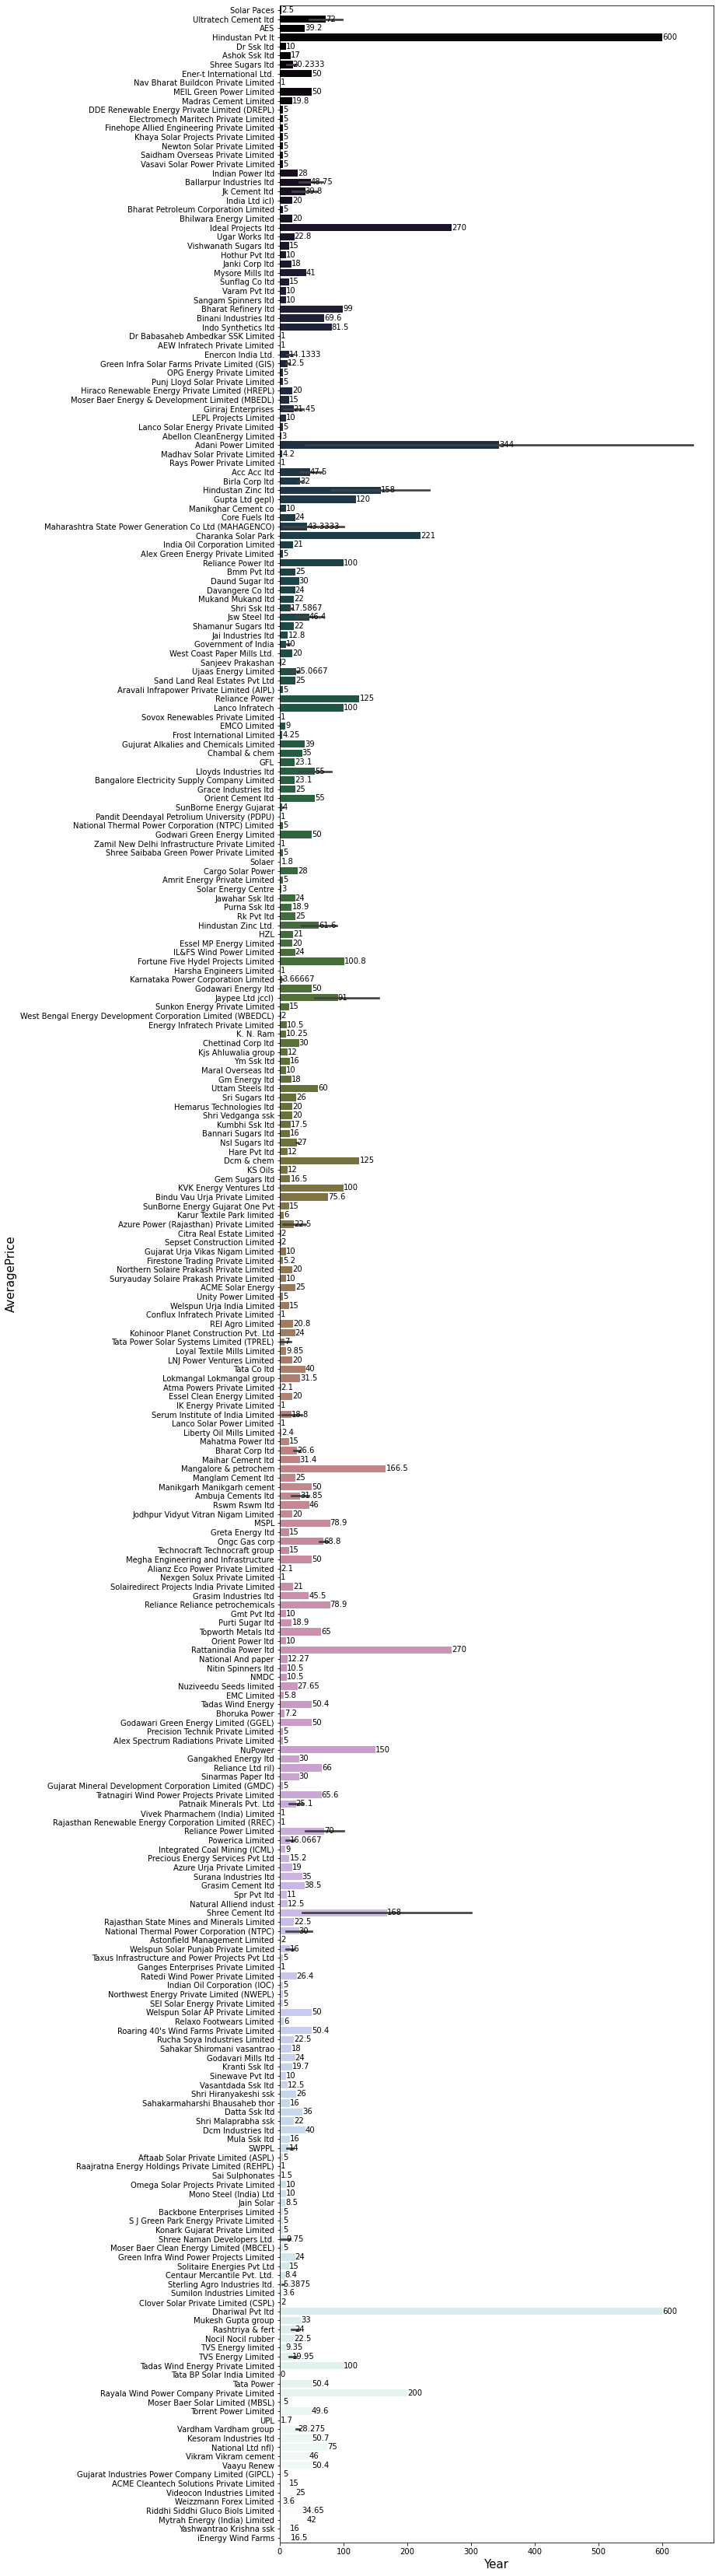

In [2586]:
# Comparing power plants by Owner and capacity_mw by barplot

plt.figure(figsize=(10,60))
ab = sns.barplot(data =power_plant,x='capacity_mw',y='owner',palette="cubehelix")
power_plant['owner']
plt.xlabel('Year',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
for i in ab.containers:
    ab.bar_label(i,fontsize=10)
plt.show()

### Observations

Hindustan Pvt Ltd and Dhariwal Pvt Ltd are the top two owners who owns power plants with electrical generating capacity of 600 megawatts,
followed by Adani Power Limited with 344 megawatts capacity

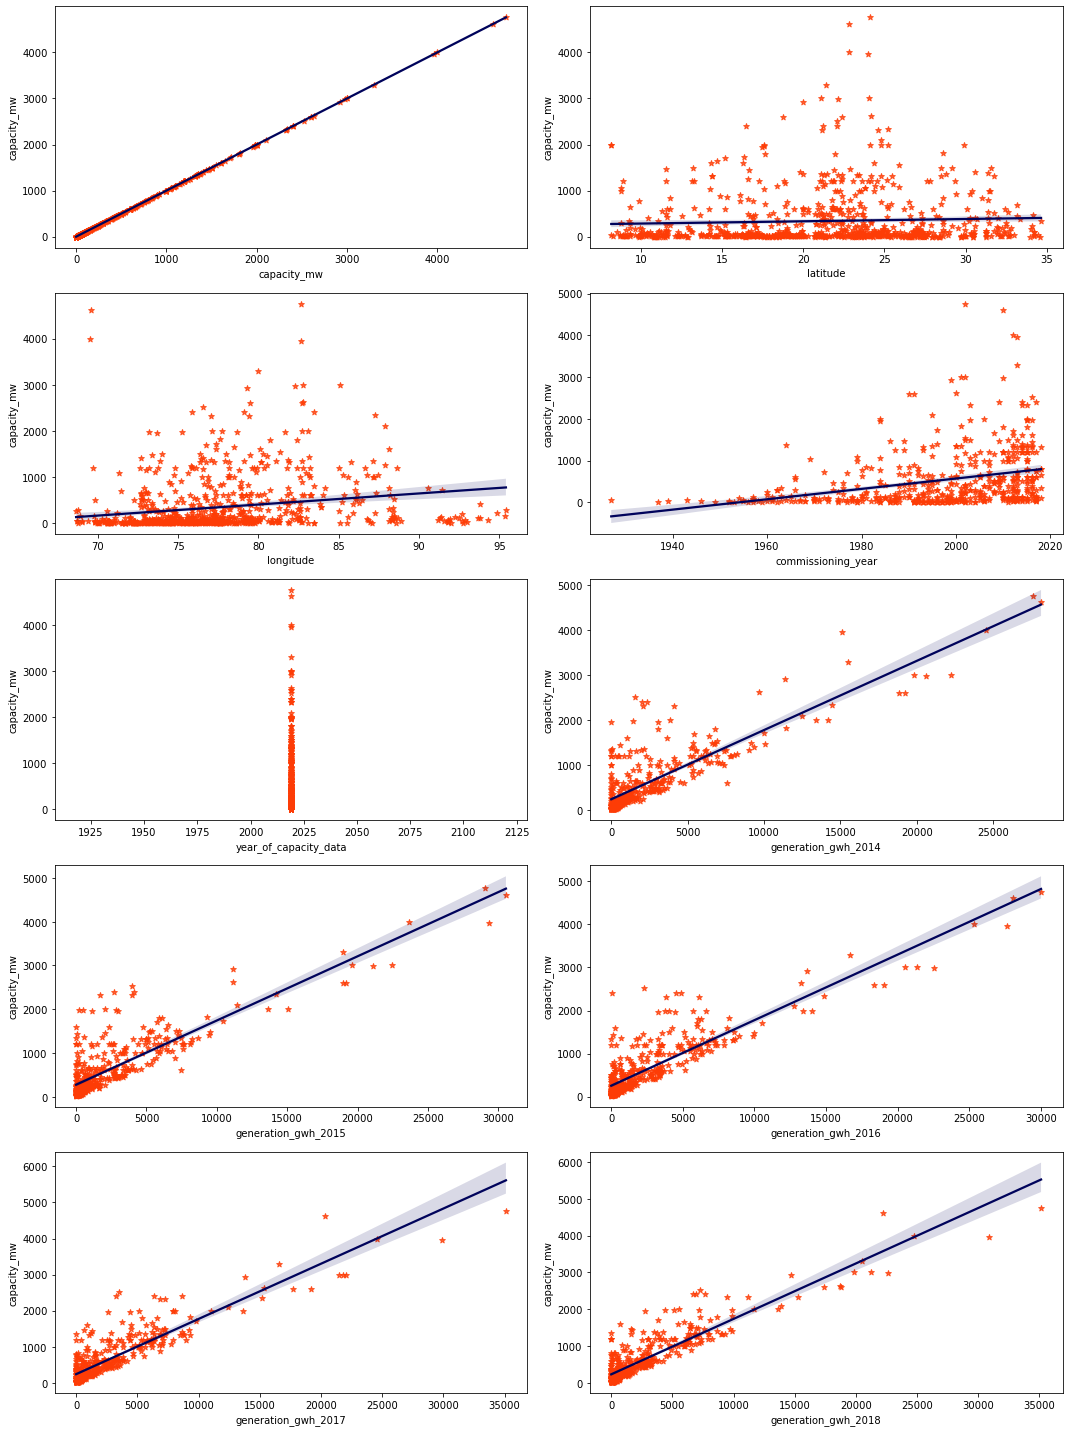

In [2587]:
# Visualizing the dataset with regplot with target variable 'capacity_mw'

plt.figure(figsize=(15,20))
plot_number=1
for i in power_plant_num:
    if plot_number <=10:
        ax=plt.subplot(5,2,plot_number)
        sns.regplot(x=power_plant[i],y=power_plant['capacity_mw'],scatter_kws={"color": "#fd3c06"}, 
                    line_kws={"color": "#00035b"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

### Observation

latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and
generation_gwh_2018 have positive relation with the target variable capacity_mw

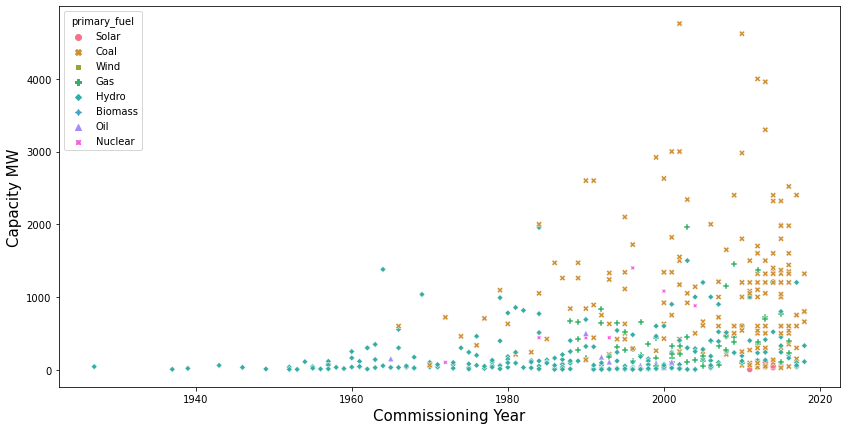

In [2588]:
# Comparing commissioning year vs capacity_mw vs primary_fuel by scatterplot

plt.figure(figsize=(14,7))
sns.scatterplot(data=power_plant, x="commissioning_year", y="capacity_mw", hue="primary_fuel",style="primary_fuel",
               palette='husl')
plt.xlabel('Commissioning Year',fontsize=15)
plt.ylabel('Capacity MW',fontsize=15)
plt.show()

### Observations

From above scatter plot we can observe, before 1980's Hydro powered power plants are maximum in India

After 1980's power plants which uses coal as primary fuel started increasing with larger capacity across the country 

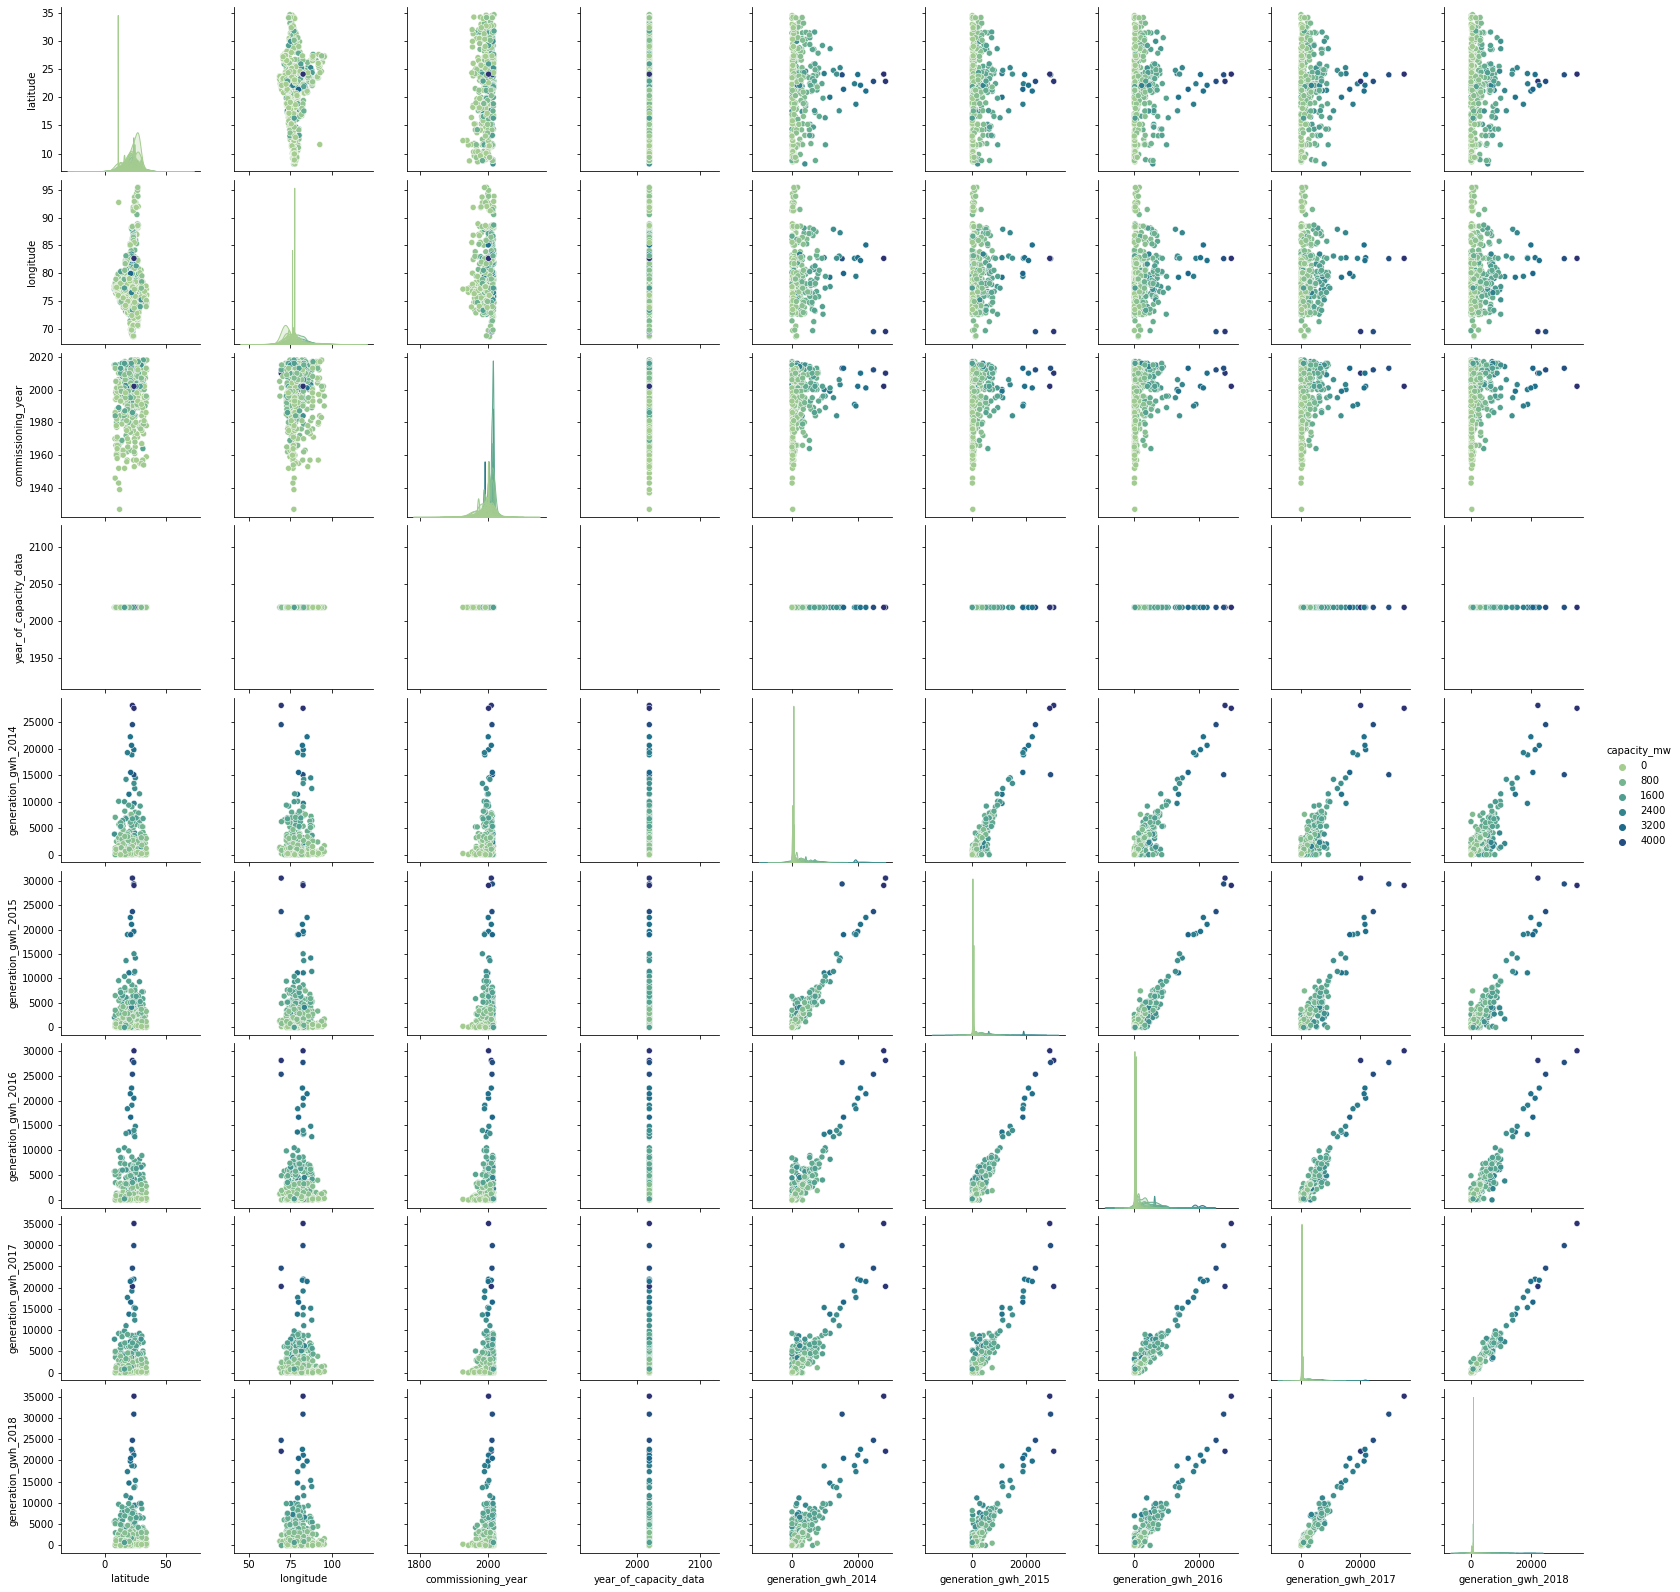

In [2589]:
#Visualizing the dataset with pairplot by target variable 'capacity_mw'

sns.pairplot(power_plant,hue='capacity_mw',palette='crest')

### Observations:
    
Above pairplot shows the relation between features on basis of the target variable capacity_mw

Most of the columns have linear relationship and correlation with each other

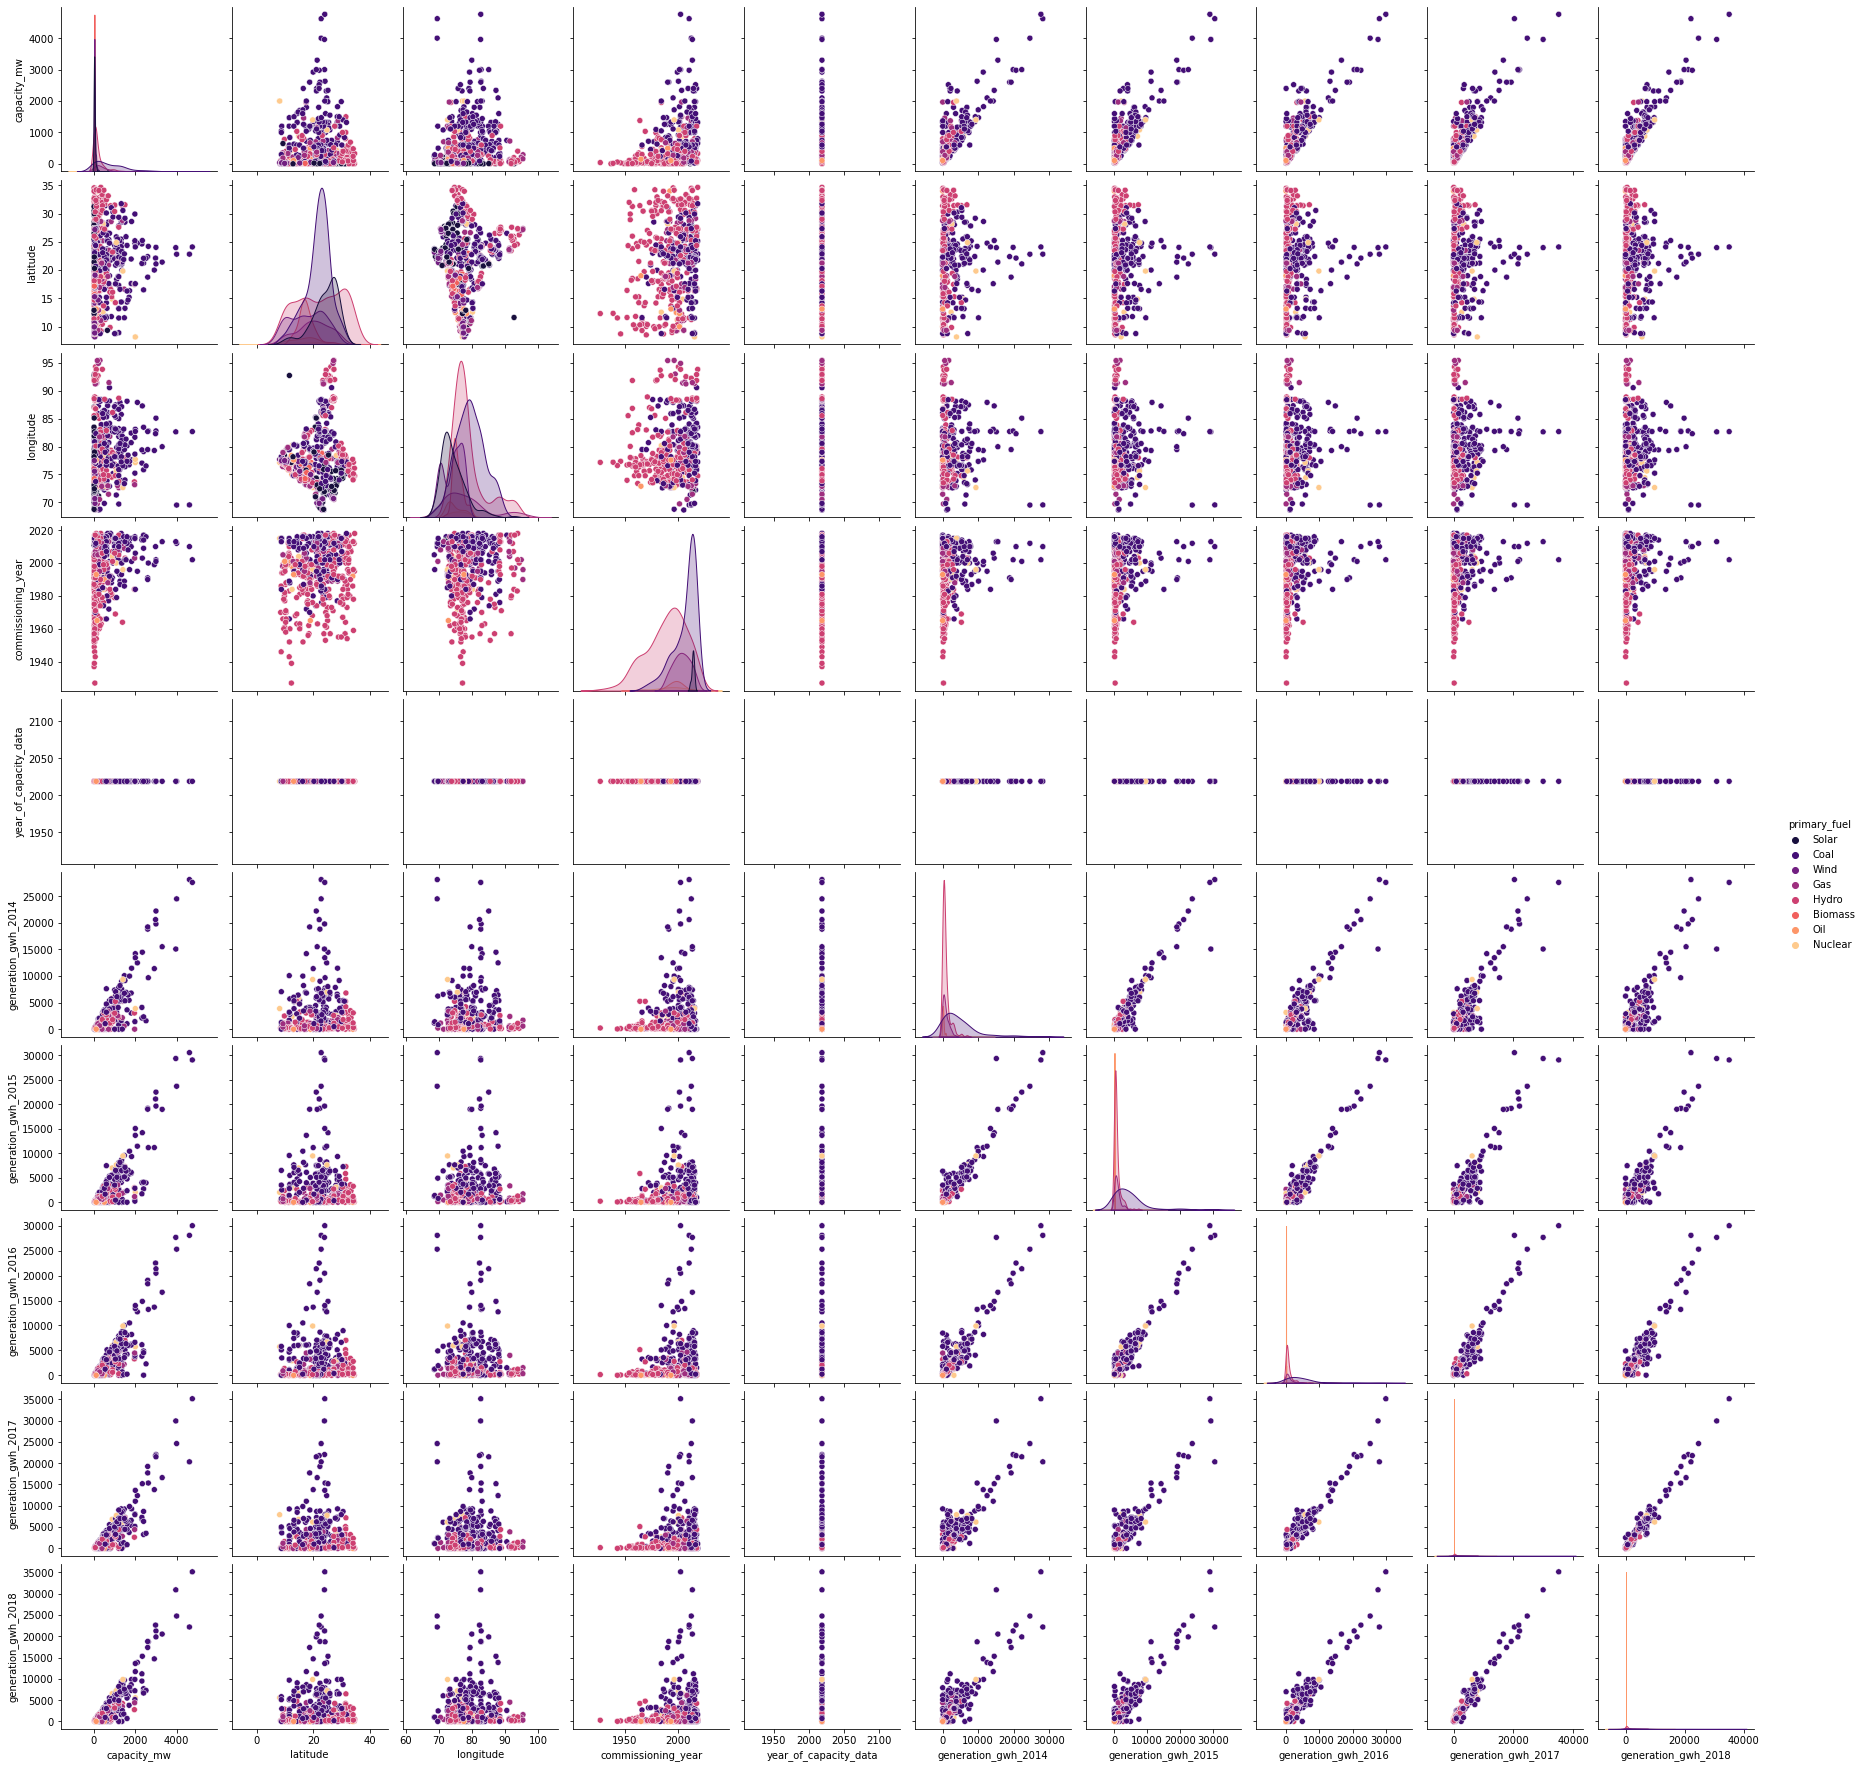

In [2590]:
#Visualizing the dataset with pairplot by target variable 'primary_fuel'

sns.pairplot(power_plant,hue='primary_fuel',palette='magma')

### Observations:
    
Above pairplot shows the relation between features on basis of the target variable capacity_mw

Most of the columns have linear relationship and correlation with each other.

Plot shows the presence of outliers in most of the columns

In [2591]:
# Dropping features which are not much relevant for Model Prediction

power_plant.drop(['country','country_long','gppd_idnr','url','name','generation_data_source','year_of_capacity_data',
                  'generation_gwh_2014','owner'],axis=1,inplace=True)
                 
power_plant.shape

(907, 11)

Before moving to further analysis dropping columns which are not much relevant for Model prediction

Dropped columns 'country', 'country_long','name','gppd_idnr' as these features contains only 1 unique values

Dropped column 'Url' as it wont be much relevant feature for Model Prediction

Dropped columns 'generation_data_source','year_of_capacity_data' as it contains only one unique value 

Dropped column 'owner' as it contains 62% null values and 'generation_gwh_2014' which contains 56% null values

Dimension of the dataset is 907 rows and 12 columns, after dropping the features 'country','country_long','gppd_idnr','name','url','generation_data_source','year_of_capacity_data',
'owner'

# Data Feature Selection and Engineering

## Replacing NAN and Null values with Simple Imputer

In [2592]:
# Replacing Null values for numerical columns with mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN,strategy="mean")
power_plant['latitude']=imp.fit_transform(power_plant['latitude'].values.reshape(-1,1))

In [2593]:
# Replacing Null values for numerical columns with median

imp = SimpleImputer(missing_values=np.NaN,strategy="median")
power_plant['longitude']=imp.fit_transform(power_plant['longitude'].values.reshape(-1,1))
power_plant['generation_gwh_2015']=imp.fit_transform(power_plant['generation_gwh_2015'].values.reshape(-1,1))
power_plant['generation_gwh_2016']=imp.fit_transform(power_plant['generation_gwh_2016'].values.reshape(-1,1))
power_plant['generation_gwh_2017']=imp.fit_transform(power_plant['generation_gwh_2017'].values.reshape(-1,1))
power_plant['generation_gwh_2018']=imp.fit_transform(power_plant['generation_gwh_2018'].values.reshape(-1,1))

In [2594]:
# Replacing Null values with most frequent

imp = SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
power_plant['geolocation_source']=imp.fit_transform(power_plant['geolocation_source'].values.reshape(-1,1))
power_plant['commissioning_year']=imp.fit_transform(power_plant['commissioning_year'].values.reshape(-1,1))

In [2595]:
# Checking null values in the dataset

power_plant.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

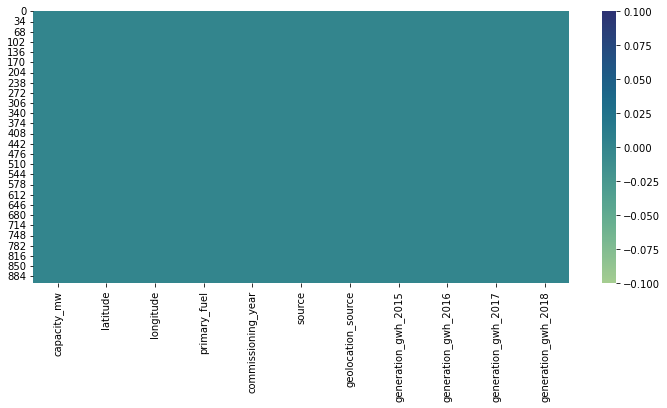

In [2596]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(power_plant.isnull(),cmap="crest")

### Observations:

Imported Simple Imputer to handle null values

Used 'mean' to replace null values for the feature latitude as the column is approximately distributed normal
 
Used 'median' to replace null values for features longitude, generation_gwh_2015,generation_gwh_2016,
generation_gwh_2017 and generation_gwh_2018 as the distribution in these columns are skewed 
 
Used 'most_frequent' for 'geolocation_source' and 'commissioning_year' which has less number of unique values

Heatmap shows no null values present in the dataset

## Label Encoding

In [2597]:
# Label encoding categorical columns


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for i in power_plant.columns:
    if(power_plant[i].dtypes=='object'):
        power_plant[i]=le.fit_transform(power_plant[i].values.reshape(-1,1))

In [2598]:
power_plant.head(3)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407             6              2011.0     109   
1         98.0   24.7663    74.6090             1              2015.0     174   
2         39.2   21.9038    69.3732             7              2015.0      21   

   geolocation_source  generation_gwh_2015  generation_gwh_2016  \
0                   1           711.181225            737.20545   
1                   2           711.181225            737.20545   
2                   2           711.181225            737.20545   

   generation_gwh_2017  generation_gwh_2018  
0            817.97725           751.644375  
1            817.97725           751.644375  
2            817.97725           751.644375

### Observations

Encoded the categorical columns primary_fuel,source and geolocation_source by label Encoder

## Describe - Statistical Summary

In [2599]:
power_plant.describe().T

count         mean          std        min          25%  \
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.427103     4.815073    68.6447    74.388900   
primary_fuel         907.0     3.206174     2.280652     0.0000     1.000000   
commissioning_year   907.0  2004.594267    15.734928  1927.0000  1998.000000   
source               907.0    43.847850    44.642818     0.0000    22.000000   
geolocation_source   907.0     1.733186     0.677151     0.0000     2.000000   
generation_gwh_2015  907.0  1510.071296  2984.994556     0.0000   711.181225   
generation_gwh_2016  907.0  1565.361383  3005.087210     0.0000   737.205450   
generation_gwh_2017  907.0  1657.121797  3046.862910     0.0000   817.977250   
generation_gwh_2018  907.0  1665.011030  3168.826750     0.0000   751.644375   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.719500    79.206100     95.408  
primary_fuel            3.000000     6.000000      7.000  
commissioning_year   2014.000000  2015.000000   2018.000  
source                 22.000000    29.500000    190.000  
geolocation_source      2.000000     2.000000      2.000  
generation_gwh_2015   711.181225   711.181225  30539.000  
generation_gwh_2016   737.205450   737.205450  30015.000  
generation_gwh_2017   817.977250   817.977250  35116.000  
generation_gwh_2018   751.644375   751.644375  35136.000

### Observations

Count is same across all the columns stating no missing values

Mean is greater than median(50%) in columns 'capacity_mw','source','generation_gwh_2014','generation_gwh_2015',
'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018' which shows data is skewed towards right side

Also we can see the difference between 75% to max are high in columns 'capacity_mw','latitude','longitude',
'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
which indicates presence of outliers

## Correlation Analysis

<AxesSubplot:>

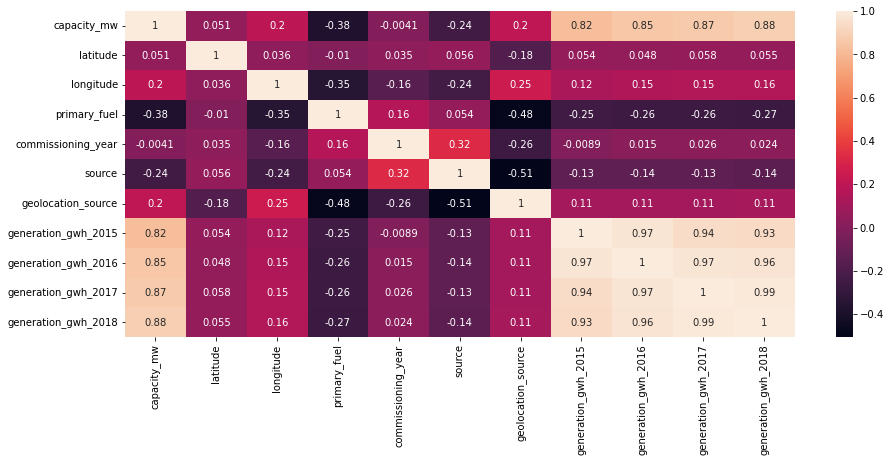

In [2600]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(15,6))
sns.heatmap(power_plant.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

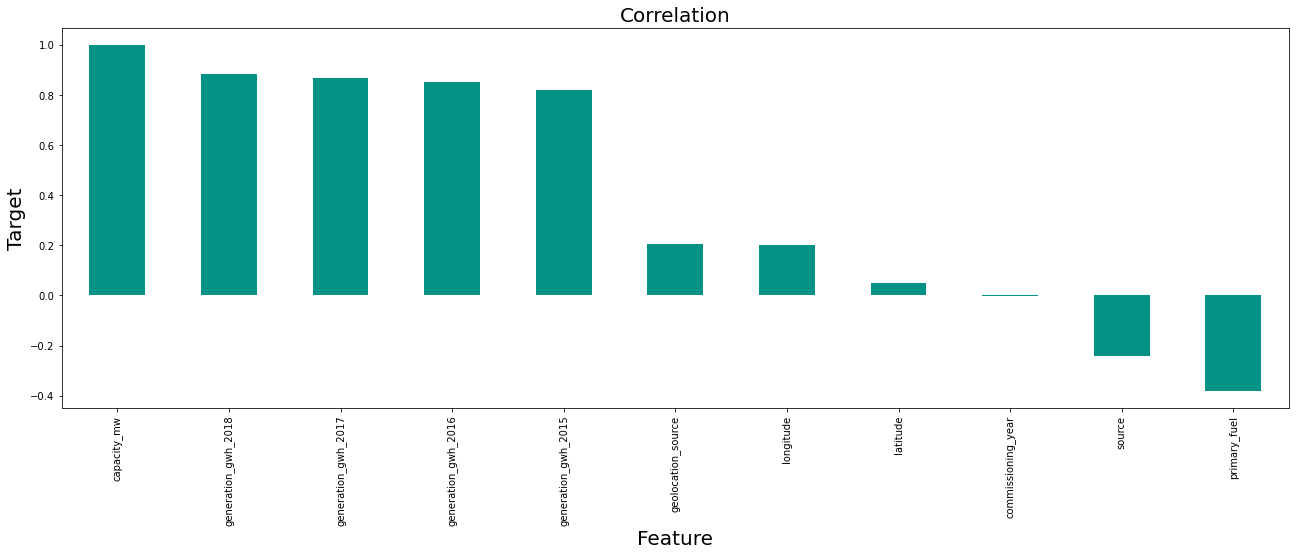

In [2601]:
# Checking Correlation of the input attributes with the Target variable 'capacity_mw' by Bar Plot

plt.figure(figsize=(22,7))
power_plant.corr()['capacity_mw'].sort_values(ascending=False).plot(kind='bar',color='#029386')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

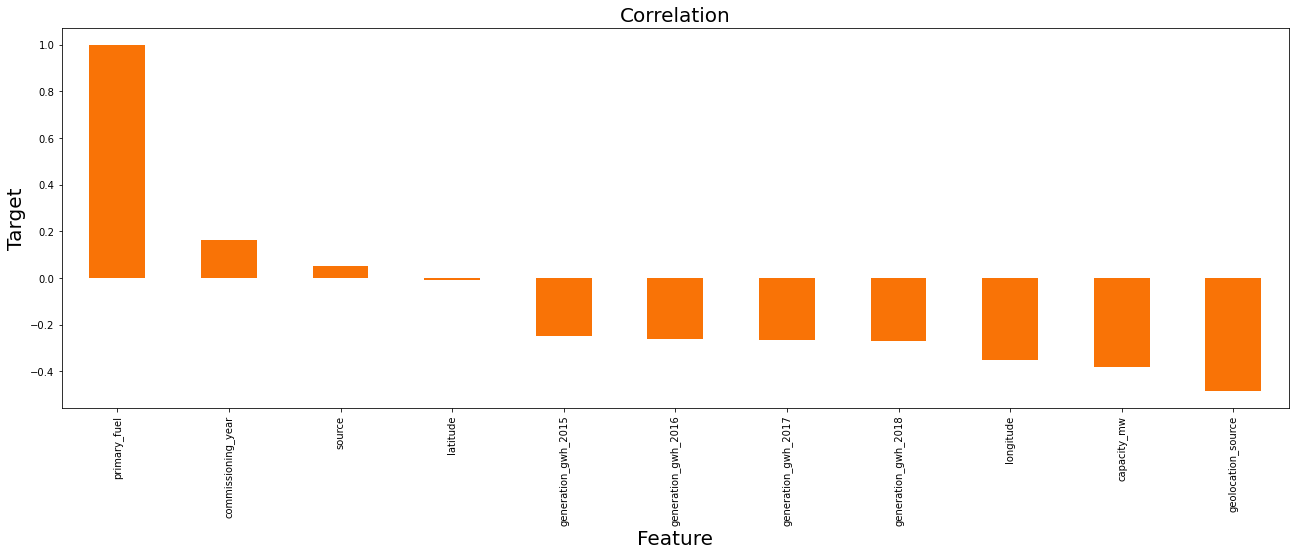

In [2602]:
# Checking Correlation of the input attributes with the Target variable 'primary_fuel' by Bar Plot

plt.figure(figsize=(22,7))
power_plant.corr()['primary_fuel'].sort_values(ascending=False).plot(kind='bar',color='#f97306')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [2603]:
power_plant.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
source                -0.242122
commissioning_year    -0.004072
latitude               0.050984
longitude              0.199299
geolocation_source     0.204865
generation_gwh_2015    0.819676
generation_gwh_2016    0.853008
generation_gwh_2017    0.868338
generation_gwh_2018    0.884840
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

In [2604]:
power_plant.corr()['primary_fuel'].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.352056
generation_gwh_2018   -0.271198
generation_gwh_2017   -0.263599
generation_gwh_2016   -0.259708
generation_gwh_2015   -0.249304
latitude              -0.010204
source                 0.053613
commissioning_year     0.164947
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

### Observations
    
Based on heatmap and barplot we can observe 'primary_fuel' and 'source' are negatively correlated with
target variable 'capacity_mw'

'latitude ','longitude','geolocation_source','commissioning_year','generation_gwh_2015','generation_gwh_2016',
'generation_gwh_2017' and 'generation_gwh_2018' are positively correlated with target variable 'capacity_mw'

For the target variable 'primary_fuel', we can see 'geolocation_source','capacity_mw','generation_gwh_2015',
'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','latitude ' and 'longitude'
are negatively correlarted

'source' is positively correlated with target variable 'primary_fuel'

Moreover 'geolocation_source' and 'source' are negatvely correlated to each other

## Outliers Treatment with Zscore

In [2605]:
# Removing outliers with zscore 

from scipy.stats import zscore

col = ['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
       'generation_gwh_2018']
z1 = power_plant[col]
z1.head()

capacity_mw  latitude  longitude  commissioning_year  generation_gwh_2015  \
0          2.5   28.1839    73.2407              2011.0           711.181225   
1         98.0   24.7663    74.6090              2015.0           711.181225   
2         39.2   21.9038    69.3732              2015.0           711.181225   
3        135.0   23.8712    91.3602              2004.0           843.747000   
4       1800.0   21.9603    82.4091              2015.0          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0           737.205450           817.977250           751.644375  
1           737.205450           817.977250           751.644375  
2           737.205450           817.977250           751.644375  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [2606]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 179, 183,
       209, 209, 209, 209, 209, 222, 244, 308, 308, 308, 308, 308, 323,
       333, 340, 342, 360, 363, 364, 364, 364, 364, 364, 371, 375, 416,
       427, 444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 601,
       621, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
       695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724, 724, 724,
       724, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
       788, 807, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880, 880,
       880, 880], dtype=int64), array([0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 0, 2, 2, 0, 4, 5, 6, 7, 3, 2, 0, 4,
       5, 6, 7, 2, 2, 2, 3, 2, 0, 0, 4, 5, 6, 7, 3, 0, 2, 2, 3, 3, 3, 0,
       7, 3, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3,
       2, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 0, 4, 5, 6, 7, 3, 3, 4, 5, 6, 7,
       4, 5, 6, 7, 0, 4, 5,

In [2607]:
power_plant_new = power_plant[(z<3).all(axis=1)]

In [2608]:
power_plant.shape

(907, 11)

In [2609]:
power_plant_new.shape

(851, 11)

In [2611]:
# Checking the dataloss

dataloss = (907-851)/907*100
dataloss

6.174200661521499

### Observations:
    
After applying z score to remove outliers, data loss is at 6.17% which is in acceptable range.

## Skewness

In [2612]:
power_plant_new.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
commissioning_year    -1.532062
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    2.845624
generation_gwh_2016    2.759964
generation_gwh_2017    2.632970
generation_gwh_2018    2.670910
dtype: float64

In [2613]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['commissioning_year','generation_gwh_2015','generation_gwh_2016', 
       'generation_gwh_2017','generation_gwh_2018']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
power_plant_new[skew] = pt.fit_transform(power_plant_new[skew].values)

In [2614]:
power_plant_new.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
commissioning_year          NaN
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    0.170962
generation_gwh_2016    0.155517
generation_gwh_2017    0.133191
generation_gwh_2018    0.137546
dtype: float64

In [2615]:
# Applying log method to reduce skewness in longitude

power_plant['longitude']= np.log(power_plant['longitude'])

In [2616]:
# Applying sqrt method to reduce skewness in longitude

power_plant['longitude']= np.sqrt(power_plant['longitude'])

In [2617]:
# Applying cbrt method to reduce skewness in longitude

power_plant['longitude']= np.cbrt(power_plant['longitude'])

In [2618]:
# Checking skewness

power_plant_new.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
commissioning_year          NaN
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    0.170962
generation_gwh_2016    0.155517
generation_gwh_2017    0.133191
generation_gwh_2018    0.137546
dtype: float64

In [2619]:
# Dropping feature 'commissioning_year' 

power_plant_new.drop(['commissioning_year'],axis=1,inplace=True)
power_plant_new.shape

(851, 10)

### Observations

Skewness was high in columns 'capacity_mw','longitude','commissioning_year','source','geolocation_source',
'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'

Applied PowerTransformer yea-johnson method for the following numerical features 'commissioning_year','generation_gwh_2015','generation_gwh_2016', 
'generation_gwh_2017','generation_gwh_2018' and skewness got reduced

Not applied for 'capacity_mw' as it is the target variable 

When Applying PowerTransformer 'yea-johnson' and 'box cox' method for 'longitude' the skewness is becoming 0, instead
of applying these methods, tried with 'log', 'sqrt' and 'cbrt' still skewness not reduced, hence keeping the
threshold as +/-0.95 for all numerical columns

Dropped column 'commissioning_year', as the value became NaN after applying power transform, even tried separately 
with 'log', 'sqrt' and 'cbrt' but skewness not reduced, hence dropped the feature 'commissioning_year' 

## Variance Inflation Factor

In [2620]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = power_plant_new.drop("capacity_mw",axis=1)
x.sample(5)

latitude  longitude  primary_fuel  source  geolocation_source  \
662  18.764000    79.4873             6     110                   0   
784  21.197918    76.7195             3      22                   2   
430  21.197918    76.7195             3      22                   2   
540  21.197918    76.7195             1      22                   2   
636  27.114000    88.1376             3      22                   2   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
662            17.514701            17.710979            19.700874   
784            17.514701            17.710979            19.700874   
430            17.514701            17.710979            19.700874   
540             9.731781            11.667455             8.514738   
636            12.457372            12.364198            10.133054   

     generation_gwh_2018  
662            18.276350  
784            18.276350  
430            18.276350  
540             7.875955  
636            12.412721

In [2621]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor             Features
0   13.236601             latitude
1   47.188147            longitude
2    3.623117         primary_fuel
3    2.571776               source
4   12.779725   geolocation_source
5   35.263963  generation_gwh_2015
6   81.504301  generation_gwh_2016
7   69.927392  generation_gwh_2017
8   64.830029  generation_gwh_2018


In [2622]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['latitude','longitude','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
    'generation_gwh_2018']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

latitude  longitude  primary_fuel  source  geolocation_source  \
339  1.130792   0.889352             1      22                   2   
778  0.305969  -1.505944             7      21                   2   
639  1.012734   2.626818             3      22                   2   
311 -1.924812  -0.009256             3      22                   2   
570  0.421968   2.267095             3      22                   2   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
339            -0.691797            -0.603813            -1.076319   
778            -0.045337            -0.044442            -0.029611   
639            -0.579740            -0.593892            -0.650885   
311            -0.965345            -1.153620            -1.090698   
570            -1.452688            -1.146621            -1.150388   

     generation_gwh_2018  
339            -1.142548  
778            -0.051178  
639            -0.589018  
311            -0.856906  
570            -1.351232

In [2623]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor             Features
0    1.034436             latitude
1    1.222972            longitude
2    2.312206         primary_fuel
3    1.653538               source
4    2.132469   geolocation_source
5    4.701527  generation_gwh_2015
6   10.841973  generation_gwh_2016
7    9.787091  generation_gwh_2017
8    9.297840  generation_gwh_2018


In [2624]:
x2 = x.drop(['generation_gwh_2016'],axis=1)
x2.sample(3)

latitude  longitude  primary_fuel  source  geolocation_source  \
90  -0.432529  -0.843130             3      22                   2   
182 -0.523366   1.121957             3      22                   2   
614 -1.975119   0.102144             7      21                   2   

     generation_gwh_2015  generation_gwh_2017  generation_gwh_2018  
90             -0.132795             0.037391             0.095939  
182            -0.045337            -0.029611            -0.051178  
614            -0.045337            -0.029611            -0.051178

In [2625]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

   VIF Factor             Features
0    1.032442             latitude
1    1.215417            longitude
2    2.311786         primary_fuel
3    1.653026               source
4    2.132464   geolocation_source
5    2.661509  generation_gwh_2015
6    8.558546  generation_gwh_2017
7    8.670334  generation_gwh_2018


### Observations

VIF factor was high in features latitude,longitude,geolocation_source,generation_gwh_2015,generation_gwh_2016,
generation_gwh_2017 and generation_gwh_2018

Applied scaling method to standardize the features and VIF reduced below threshold for all the features, except generation_gwh_2016.
hence dropping the feature generation_gwh_2016.

# Regression Model Evaluation -- Prediction:capacity_mw

In [2626]:
# Checking the dimension of the data for train, test

x2.shape

(851, 8)

In [2627]:
# Splitting the target variable for train, test

y= power_plant_new['capacity_mw']
y.shape

(851,)

In [2628]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Finding Random State

In [2629]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=.30,random_state=i)
    RF = RandomForestRegressor()
    RF.fit(x2_train,y_train)
    predRF = RF.predict(x2_test)
    acc = r2_score(y_test,predRF)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  87.74195116991031 on Random state 138


## Train and Test Split

In [2631]:
# Training the Model with .30 as test size and random state at 138

x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=.30, random_state=138)

# Model Selection

In [2632]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

## Lasso

In [2633]:
ls = Lasso()

ls.fit(x2_train,y_train)
ls.score(x2_train,y_train)
print(ls.score(x2_train,y_train)*100)
ls_predict=ls.predict(x2_test)
cr1 = cross_val_score(ls,x2,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ls_predict)))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

49.00233202897273
MSE: 75426.02014895507
MAE: 206.24050525163187
RMSE: 274.6379801647162
r2_score: 30.525663313926778
CV score of Lasso Regression: 52.81263656384492


## Ridge

In [2634]:
rd = Ridge()  
rd.fit(x2_train,y_train)
rd.score(x2_train,y_train)
print(rd.score(x2_train,y_train))
rd_predict=rd.predict(x2_test)
cr2 = cross_val_score(rd,x2,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rd_predict)))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

0.49007392423018536
MSE: 75183.12207121312
MAE: 205.84674291628238
RMSE: 274.19540855239194
r2_score: 31.211192169130708
CV score of Ridge Regression: 52.80515915123184


## Linear Regression

In [2635]:
LR=LinearRegression()
LR.fit(x2_train,y_train)
print(LR.score(x2_train,y_train))
LR_predict=LR.predict(x2_test)
cr3 = cross_val_score(LR,x2,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, LR_predict)))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

0.49007751673725075
MSE: 75272.43785254055
MAE: 205.89184363177114
RMSE: 274.35822905927307
r2_score: 31.243451529352207
CV score of Linear Regression: 52.78611821567558


## Random Forest Regressor

In [2649]:
RFR = RandomForestRegressor()
RFR.fit(x2_train,y_train)
print(RFR.score(x2_train,y_train))
RFR_predict=RFR.predict(x2_test)
cr4 = cross_val_score(RFR,x2,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, RFR_predict)))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

0.9634454968456145
MSE: 25281.735645889697
MAE: 95.15187040226124
RMSE: 159.00231333502572
r2_score: 86.14866764837907
CV score of Random Forest Regressor: 78.08088005392231


## Decision Tree Regressor

In [2650]:
DT = DecisionTreeRegressor()
DT.fit(x2_train,y_train)
print(DT.score(x2_train,y_train))
DT_predict=DT.predict(x2_test)
cr5 = cross_val_score(DT,x2,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, DT_predict)))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of Decision Tree Regressor:',cr5.mean()*100)

0.9998416565718434
MSE: 43762.72745075488
MAE: 114.184560546875
RMSE: 209.19542884765642
r2_score: 76.93743238641973
CV score of Decision Tree Regressor: 60.776900146914


## ExtraTreesRegressor

In [2651]:
ET = ExtraTreesRegressor()
ET.fit(x2_train,y_train)
print(ET.score(x2_train,y_train))
ET_predict = ET.predict(x2_test)
cr11 = cross_val_score(ET,x2,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr11.mean()*100)

0.9998415395928206
MSE: 26655.68203481885
MAE: 94.66481169921875
RMSE: 163.26567929243075
r2_score: 85.94057057041118
CV score of Extra Trees Regressor: 79.12424043434892


## Gradient Boosting Regressor

In [2652]:
GB = GradientBoostingRegressor()
GB.fit(x2_train,y_train)
print(GB.score(x2_train,y_train))
GB_predict = GB.predict(x2_test)
cr6 = cross_val_score(GB,x2,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, GB_predict)))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr6.mean()*100)

0.948191322387128
MSE: 30521.48999154236
MAE: 105.69176084057598
RMSE: 174.70400679876337
r2_score: 82.73644279270394
CV score of Gradient Boosting Regressor: 74.73675005096372


## K Neighbors Regressor

In [2653]:
KNN = KNeighborsRegressor()
KNN.fit(x2_train,y_train)
print(KNN.score(x2_train,y_train))
KNN_predict = KNN.predict(x2_test)
cr7 = cross_val_score(KNN,x2,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, KNN_predict)))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

0.7951248507768209
MSE: 32539.571419101405
MAE: 101.09710546875
RMSE: 180.38728175539816
r2_score: 79.64487654654073
CV score of K Neighbors Regressor: 73.96689902109004


## BaggingRegressor

In [2654]:
BR = BaggingRegressor()
BR.fit(x2_train,y_train)
print(BR.score(x2_train,y_train))
BR_predict = BR.predict(x2_test)
cr8 = cross_val_score(BR,x2,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, BR_predict)))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr8.mean()*100)

0.9468359513944308
MSE: 27941.75890804194
MAE: 101.27442760655684
RMSE: 167.15788616766466
r2_score: 85.14839042700213
CV score of Bagging Regressor: 76.82041304599377


## SGDRegressor

In [2655]:
SR = SGDRegressor()
SR.fit(x2_train,y_train)
print(SR.score(x2_train,y_train))
SR_predict = SR.predict(x2_test)
cr9 = cross_val_score(SR,x2,y,cv=5)

print('MSE:',mean_squared_error(SR_predict,y_test))
print('MAE:',mean_absolute_error(SR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, SR_predict)))
print('r2_score:',r2_score(SR_predict,y_test)*100)
print('CV score of SGD Regressor:',cr9.mean()*100)

-1.7831802904058392e+16
MSE: 3.1879801620613274e+21
MAE: 41618462170.572075
RMSE: 56462201179.73907
r2_score: -3.1305984927814334
CV score of SGD Regressor: -1.4487292545705976e+22


## AdaBoostRegressor

In [2656]:
ABR = AdaBoostRegressor()
ABR.fit(x2_train,y_train)
print(ABR.score(x2_train,y_train))
ABR_predict = ABR.predict(x2_test)
cr10 = cross_val_score(ABR,x2,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ABR_predict)))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

0.7090734116858242
MSE: 53304.62873101555
MAE: 202.99352191339926
RMSE: 230.8779520244745
r2_score: 60.59240527167985
CV score of Ada Boost Regressor: 59.616877151886115


### Creating dataframe to compare Model result

In [2692]:
# Creating dataframe to compare Model result

result = [{'r2_score':r2_score(RFR_predict,y_test)*100, 'CV score': cr4.mean()*100, 'MSE':mean_squared_error(RFR_predict,y_test),
         'MAE':mean_absolute_error(RFR_predict,y_test),'RMSE':np.sqrt(mean_squared_error(y_test, RFR_predict))},
        {'r2_score': r2_score(ET_predict,y_test)*100, 'CV score': cr11.mean()*100, 'MSE':mean_squared_error(SR_predict,y_test),
         'MAE':mean_absolute_error(ET_predict,y_test),'RMSE':np.sqrt(mean_squared_error(y_test, ET_predict))}]
  
df = pd.DataFrame(result, index=['RandomForestRegressor', 'ExtraTreesRegressor'])
df

r2_score  CV score           MSE        MAE  \
RandomForestRegressor  86.148668  78.08088  2.528174e+04  95.151870   
ExtraTreesRegressor    85.940571  79.12424  3.187980e+21  94.664812   

                             RMSE  
RandomForestRegressor  159.002313  
ExtraTreesRegressor    163.265679

### Observation

Choosing ExtraTreesRegressor and RandomForestRegressor for Hyper Parameter Tuning as both the model performs well
based on their r2_score Vs CV score with MSE,MAE and RMSE

# Hyper Parameter Tuning

In [2657]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
             'max_depth':[50,100,120,150],'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2]}
            
             
        
gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x2_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})
Best Score 0.7431154372482279
Best Params {'criterion': 'poisson', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [2683]:
# Hyper Parameter Tuning for RandomForestRegressor

grid_params={'criterion': ['squared_error', 'absolute_error', 'poisson','friedman_mse'],'max_depth':[50,100,120,150],
              "n_estimators": [100,150,200],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4,5,6]}
            
            
gs = GridSearchCV(RandomForestRegressor(),param_grid=grid_params)

g_res = gs.fit(x2_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})
Best Score 0.7206641271369254
Best Params {'criterion': 'absolute_error', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [2711]:
# Tuning ExtraTreesRegressor with parameters

Final_Model = ExtraTreesRegressor(n_estimators =100, criterion = 'poisson',max_depth=100,min_samples_split=5,
                                  min_samples_leaf=2)
                                       
Final_Model.fit(x2_train,y_train)
pred = Final_Model.predict(x2_test)
scores = r2_score(y_test,pred)
cr_v = cross_val_score(Final_Model,x2,y,cv=5)

print('MSE:',mean_squared_error(pred,y_test))
print('MAE:',mean_absolute_error(pred,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred,y_test)))
print('r2_score:',r2_score(pred,y_test)*100)
print('CV score of Extra Trees Regressor:',cr_v.mean()*100)

MSE: 24783.670383519304
MAE: 93.22683863691205
RMSE: 157.42830235862706
r2_score: 86.56079729702881
CV score of Extra Trees Regressor: 79.91772655322367


# Final Model - Regression

In [2725]:
# Tuning RandomForestRegressor with parameters

Final_Model2 = RandomForestRegressor(n_estimators =100, criterion = 'absolute_error',min_samples_split=4,max_depth=100,
                                     min_samples_leaf=2)
                                       
Final_Model2.fit(x2_train,y_train)
pred2 = Final_Model2.predict(x2_test)
scores = r2_score(y_test,pred)
cr_v1 = cross_val_score(Final_Model2,x2,y,cv=5)

print('MSE:',mean_squared_error(pred2,y_test))
print('MAE:',mean_absolute_error(pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test)))
print('r2_score:',r2_score(pred,y_test)*100)
print('CV score of RandomForestRegressor:',cr_v1.mean()*100)

MSE: 23105.073652284722
MAE: 88.8443558203125
RMSE: 152.00353170990707
r2_score: 86.56079729702881
CV score of RandomForestRegressor: 79.54707111600531


# Saving the Final model - RandomForestRegressor

In [2844]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model2,"Global_pp_capacity.pkl")

['Global_pp_capacity.pkl']

# Predicting the Model

In [2845]:
# Loading the saved model

Model=joblib.load("Global_pp_capacity.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([ 711.4622 ,  641.5002 ,   20.2445 ,   40.99875,  106.837  ,
          8.89775, 1437.39   ,  630.742  ,   88.14975, 1319.4    ,
        982.8    ,   49.449  ,   39.3645 ,   15.384  ,  154.8642 ,
        557.89474,   40.62975,  655.8594 ,  542.36001,   76.79545,
         20.287  ,    7.60975,    7.6955 ,    5.215  , 1231.967  ,
         67.52215,  359.29642,   88.39485,   21.951  ,   26.9805 ,
        111.0225 ,   20.56075, 1412.8182 ,    5.21   ,  102.49025,
        698.9161 ,  146.4465 ,    9.778  ,  605.256  ,   28.6855 ,
         42.292  , 1330.888  ,  162.9236 ,  757.501  ,   34.2355 ,
         49.546  ,  374.07515,  492.84734, 1222.3827 ,  185.20135,
         21.1285 ,  162.7435 , 1118.1275 ,  309.558  ,  240.1048 ,
         13.43425,   44.5945 ,  723.25   ,  187.5364 ,  422.0173 ,
         47.6645 ,   27.95125,  619.2912 ,    7.9875 ,   48.67425,
       1062.2625 ,   38.0277 ,  600.92642,  473.27018,   10.739  ,
         27.9647 , 1246.0175 ,    9.448  ,   24.713  ,   88.97

In [2846]:
pd.DataFrame([Model.predict(x2_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0     711.46220   480.000
1     641.50020   450.000
2      20.24450     0.000
3      40.99875    50.400
4     106.83700    40.000
5       8.89775     3.750
6    1437.39000  1320.000
7     630.74200   500.000
8      88.14975    50.000
9    1319.40000  1340.000
10    982.80000  1000.000
11     49.44900    69.600
12     39.36450    30.000
13     15.38400    16.000
14    154.86420   160.000
15    557.89474   600.000
16     40.62975    11.200
17    655.85940  1000.000
18    542.36001   510.000
19     76.79545    50.000
20     20.28700    26.000
21      7.60975     6.000
22      7.69550    21.000
23      5.21500     5.000
24   1231.96700  1550.000
25     67.52215    55.000
26    359.29642   270.500
27     88.39485    30.000
28     21.95100    11.200
29     26.98050    15.000
30    111.02250    36.000
31     20.56075    20.000
32   1412.81820  1980.000
33      5.21000     5.000
34    102.49025    62.400
35    698.91610   780.000
36    146.44650    30.000
37      9.77800   221.000
38    605.25600   460.000
39     28.68550    10.000
40     42.29200    16.500
41   1330.88800  1200.000
42    162.92360    37.500
43    757.50100  1200.000
44     34.23550    34.650
45     49.54600    24.800
46    374.07515   800.000
47    492.84734   394.000
48   1222.38270  1080.000
49    185.20135    45.000
50     21.12850    16.500
51    162.74350   520.000
52   1118.12750  1650.000
53    309.55800   400.000
54    240.10480   250.000
55     13.43425   150.000
56     44.59450    10.500
57    723.25000   600.000
58    187.53640   165.000
59    422.01730   180.000
60     47.66450    15.000
61     27.95125    52.500
62    619.29120   390.000
63      7.98750     5.000
64     48.67425    31.200
65   1062.26250  1340.000
66     38.02770    41.000
67    600.92642   374.571
68    473.27018   440.000
69     10.73900     5.000
70     27.96470     6.250
71   1246.01750  1340.000
72      9.44800    15.000
73     24.71300    22.000
74     88.97300    50.000
75     30.03805    10.000
76    133.63700   120.000
77      9.05250    15.000
78     40.15850    36.000
79    123.56950    40.000
80    607.97540   600.000
81   1294.12500  1320.000
82    170.40955    75.000
83      8.30900    25.000
84     27.84135    50.000
85      7.66150     1.000
86    725.13500  1000.000
87    152.73315   160.000
88    633.85250  1200.000
89     85.36050    60.000
90   1118.14080  1200.000
91     46.06575    50.400
92    669.19433   600.000
93      8.23845    12.000
94    214.24640   246.000
95     46.96570   100.000
96    106.83600    15.000
97    111.73325   105.000
98    351.13250   280.000
99     11.27400   100.000
100    16.63770    35.100
101   247.31764   180.000
102  1193.41750  1210.000
103  1240.56490  1110.000
104    45.83675   155.000
105    43.58775    30.000
106    26.58500    16.000
107    23.71975   102.000
108     7.49350     3.750
109   300.44270   500.000
110   778.61120   690.000
111    49.66275    35.000
112    14.41600    19.000
113   159.96970    75.000
114    74.29700   234.000
115    64.62370    36.000
116    41.44280    50.400
117    25.88050    75.600
118  1416.95550  1500.000
119   392.48450   500.000
120    24.11475     6.250
121    59.69300    20.000
122   668.39930   440.000
123    14.82200     9.000
124   126.29970    42.000
125   609.05054   829.780
126    51.34150    25.500
127    39.99145    35.000
128    13.27750     3.000
129  1134.47040   840.000
130     6.14100     9.000
131   677.89000   420.000
132    17.53775    16.000
133     7.98750    15.000
134    24.42540    16.000
135    24.11475     3.000
136   117.04000    36.000
137   485.65869   335.000
138  1332.35000  1200.000
139  1513.50300  1080.000
140  1254.18520  1200.000
141  1124.35940  1035.000
142    46.19900    13.200
143  1264.87940  1350.000
144    13.73425    16.500
145    23.15000     3.600
146  1264.45120  1000.000
147     7.98750    18.000
148    48.85040    65.000
149    19.86275     6.000
150    24.11475    22.500
151   594.29470   440.000
152   455.41702   652.000
15

## Conclusion For Regression Model

Concluding Random Forest Regressor as the best fit model for Regression based on r2_score 86% vs CV_Score 80% with
MSE: 23105, MAE: 88 and RMSE: 152 which is better than  ExtraTreesRegressor Model.

# Classification Model Evaluation - Prediction:Primary Fuel

## Data Selection Feature Engineering

## Skewness

In [2727]:
# Checking skewness

power_plant_new.skew()

capacity_mw            1.980750
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    0.170962
generation_gwh_2016    0.155517
generation_gwh_2017    0.133191
generation_gwh_2018    0.137546
dtype: float64

In [2728]:
# Assigning new variable 

power_plant_new2 = power_plant_new

In [2731]:
# Removing skewness using power transform for 'capacity_mw'

pt = PowerTransformer(method='yeo-johnson',standardize=False)
power_plant_new2['capacity_mw'] = pt.fit_transform(power_plant_new2['capacity_mw'].values.reshape(-1,1))

In [2733]:
# Checking skewness

power_plant_new2.skew()

capacity_mw            0.015769
latitude              -0.111454
longitude              0.950173
primary_fuel           0.411242
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2015    0.170962
generation_gwh_2016    0.155517
generation_gwh_2017    0.133191
generation_gwh_2018    0.137546
dtype: float64

### Observation

Skewness was high in column 'capacity_mw', 

Applied PowerTransformer yea-johnson method and skewness got reduced

Not applied for 'geolocation_source' and 'source' as these columns are categorical and converted by LabelEncoder to umerical

When Applying PowerTransformer 'yea-johnson' and 'box cox' method for 'longitude' the skewness is becoming 0, instead of applying these methods, tried with 'log', 'sqrt' and 'cbrt' still skewness not reduced, hence keeping the threshold as +/-0.95 for all numerical columns

In [2734]:
# Checking Variance inflation factor for the dataset 
 
x3 = power_plant_new2.drop("primary_fuel",axis=1)
x3.sample(5)

capacity_mw  latitude  longitude  source  geolocation_source  \
437     2.924595   29.8509    75.4023      25                   0   
418     6.125482   21.7570    83.4573      22                   2   
643     4.343287   22.3404    82.4930      22                   2   
405     1.749764   23.3578    70.0548     175                   0   
38      1.749764   27.3566    71.6917      84                   0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
437            17.514701            17.710979            19.700874   
418            17.514701            17.710979             0.000000   
643            11.862853            13.826971            18.180273   
405            17.514701            17.710979            19.700874   
38             17.514701            17.710979            19.700874   

     generation_gwh_2018  
437            18.276350  
418            12.651930  
643            17.770009  
405            18.276350  
38             18.276350

## Variance Inflation Factor

In [2735]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0   11.683232          capacity_mw
1   13.364015             latitude
2   35.580004            longitude
3    2.660292               source
4   11.654313   geolocation_source
5   35.273023  generation_gwh_2015
6   81.331567  generation_gwh_2016
7   69.822903  generation_gwh_2017
8   64.820741  generation_gwh_2018


In [2736]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['capacity_mw','latitude','longitude','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
    'generation_gwh_2018']
st = StandardScaler()
x3[m2] = st.fit_transform(x3[m2].values)
x3.sample(5)

capacity_mw  latitude  longitude  source  geolocation_source  \
312     1.025196  0.022538  -0.852864      22                   2   
704    -1.061062  1.880555  -0.258673      22                   2   
174     0.874353  0.915864   0.195079      22                   2   
501    -1.220588 -0.588681  -0.286523      89                   0   
696    -0.433980  0.571466   0.895709      19                   2   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
312             0.794262            -2.558993            -2.484076   
704            -0.045337            -0.044442            -0.029611   
174            -0.706325            -1.310239            -0.942744   
501            -0.045337            -0.044442            -0.029611   
696            -0.045337            -0.044442            -0.029611   

     generation_gwh_2018  
312             0.074020  
704            -0.051178  
174            -1.826470  
501            -0.051178  
696            -0.051178

In [2737]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0    1.643837          capacity_mw
1    1.040447             latitude
2    1.175514            longitude
3    1.823591               source
4    1.722552   geolocation_source
5    4.718817  generation_gwh_2015
6   10.848758  generation_gwh_2016
7    9.798686  generation_gwh_2017
8    9.305828  generation_gwh_2018


In [2739]:
x3.drop(['generation_gwh_2016'],axis=1,inplace=True)
x3.shape

(851, 8)

In [2740]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x3.values,i) for i in range(len(x3.columns))]
vif['Features'] = x3.columns
print(vif)

   VIF Factor             Features
0    1.642511          capacity_mw
1    1.038735             latitude
2    1.168443            longitude
3    1.822460               source
4    1.721778   geolocation_source
5    2.689455  generation_gwh_2015
6    8.578198  generation_gwh_2017
7    8.682302  generation_gwh_2018


### Observations

VIF factor was high in features capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2015,generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018

Applied scaling method to standardize the features and VIF reduced below threshold for all the features, except generation_gwh_2016, hence dropping the feature generation_gwh_2016.


In [ ]:
# Splitted the features to x3 and y2

In [2742]:
x3.shape

(851, 8)

In [2741]:
y2 = power_plant_new2['primary_fuel']
y2.shape

(851,)

# Applying SMOTE Technique

In [2749]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

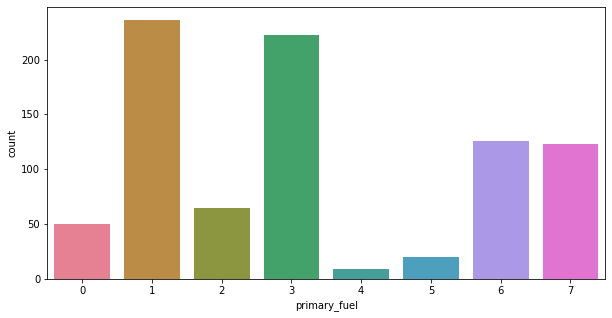

In [2748]:
# Checking the count of feature 'primary_fuel' 

plt.figure(figsize=(10,5))
sns.countplot(y2,palette='husl')

### Observation

Above countplot shows the classes are imbalanced, hence applying SMOTE technique to balance the classes

In [2750]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [2751]:
# Applying SMOTE technique 

smt = SMOTE()

x4,y3 = smt.fit_resample(x3,y2)

6    236
1    236
7    236
2    236
3    236
0    236
5    236
4    236
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

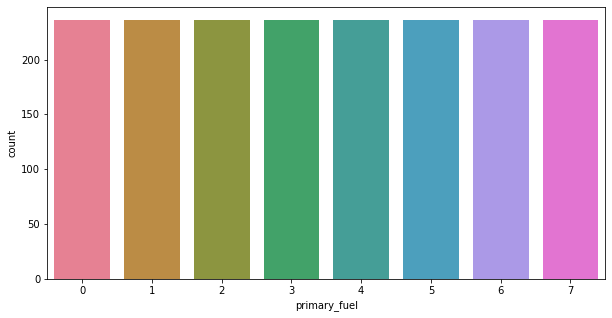

In [2753]:
# Checking the count of feature 'primary_fuel' after applying 'SMOTE'

plt.figure(figsize=(10,5))
print(y3.value_counts())
sns.countplot(y3,palette='husl')

### Observations

Applied SMOTE technique to balance the Target Variable primary_fuel

Above countplot shows target variable is equal in all the category

# Model Evaluation Classification

In [2754]:
# Checking the dimension of the data 

x4.shape

(1888, 8)

In [2755]:
# Checking the dimension of the data 

y3.shape

(1888,)

In [2756]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [2760]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x4_train,x4_test,y3_train,y3_test = train_test_split(x4,y3,test_size=.30,random_state=i)
    rc = RandomForestClassifier()
    rc.fit(x4_train,y3_train)
    predrc = rc.predict(x4_test)
    acc = accuracy_score(y3_test,predrc)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 93.47442680776014 on Random State 31


## Train and Split

In [2768]:
# Training the Model with .30 as test size and random state at 31

x4_train,x4_test,y3_train,y3_test = train_test_split(x4,y3,test_size=.30, random_state=31)

In [2762]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

## GaussianNB

In [2774]:
GB = GaussianNB()
GB.fit(x4_train,y3_train)
print(GB.score(x4_train,y3_train))
GB_predict = GB.predict(x4_test)
cr12 = cross_val_score(GB,x4,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GB_predict)*100)
print('CV score of GaussianNB:',cr12.mean()*100)
print(confusion_matrix(y3_test,GB_predict))
print(classification_report(y3_test,GB_predict))

0.5616956850870553
Accuracy Score: 54.673721340388006
CV score of GaussianNB: 56.03806155530293
[[75  0  0  0  0  0  0  0]
 [19  3  5 34 11  0  0  0]
 [ 7  0  1 56  1  0  0  0]
 [13  0  0 52  0  0  0  0]
 [ 0  0  4 25 44  0  0  0]
 [20  0  0 58  0  3  0  0]
 [ 4  0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        75
           1       1.00      0.04      0.08        72
           2       0.10      0.02      0.03        65
           3       0.23      0.80      0.36        65
           4       0.79      0.60      0.68        73
           5       1.00      0.04      0.07        81
           6       1.00      0.94      0.97        62
           7       1.00      1.00      1.00        74

    accuracy                           0.55       567
   macro avg       0.71      0.55      0.49       567
weighted avg       0.72      0.55      0.48       567



## SVC

In [2776]:
SV = SVC()
SV.fit(x4_train,y3_train)
print(SV.score(x4_train,y3_train))
SV_predict = SV.predict(x4_test)
cr13 = cross_val_score(SV,x4,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,SV_predict)*100)
print('CV score of SVC:',cr13.mean()*100)
print(confusion_matrix(y3_test,SV_predict))
print(classification_report(y3_test,SV_predict))

0.31188493565480696
Accuracy Score: 29.100529100529098
CV score of SVC: 37.129805060839544
[[45  0  0 10  0  0 20  0]
 [10  0  0 39 12  0  8  3]
 [ 6  0  0 58  0  0  1  0]
 [ 0  0  0 65  0  0  0  0]
 [ 5  0  0 43 25  0  0  0]
 [ 1  0  0 62  0  0 18  0]
 [23  0  0  6  0  0 30  3]
 [ 0  0  0 74  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        75
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        65
           3       0.18      1.00      0.31        65
           4       0.68      0.34      0.45        73
           5       0.00      0.00      0.00        81
           6       0.39      0.48      0.43        62
           7       0.00      0.00      0.00        74

    accuracy                           0.29       567
   macro avg       0.22      0.30      0.22       567
weighted avg       0.22      0.29      0.21       567



## LogisticRegression

In [2777]:
LR = LogisticRegression()
LR.fit(x4_train,y3_train)
print(LR.score(x4_train,y3_train))
LR_predict = LR.predict(x4_test)
cr14 = cross_val_score(LR,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr14.mean()*100)
print(confusion_matrix(y3_test,LR_predict))
print(classification_report(y3_test,LR_predict))

0.6389099167297502
Accuracy Score: 66.13756613756614
CV score of LogisticRegression: 64.83039310625517
[[68  0  0  1  0  0  0  6]
 [10 23 10 12 15  0  0  2]
 [ 7  5 24 15  8  5  0  1]
 [ 0  2 10 29  0 10  0 14]
 [ 0  6 13  1 52  1  0  0]
 [15  3  5  0  0 54  0  4]
 [ 3  1  0  1  0  0 57  0]
 [ 0  0  1  5  0  0  0 68]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        75
           1       0.57      0.32      0.41        72
           2       0.38      0.37      0.38        65
           3       0.45      0.45      0.45        65
           4       0.69      0.71      0.70        73
           5       0.77      0.67      0.72        81
           6       1.00      0.92      0.96        62
           7       0.72      0.92      0.80        74

    accuracy                           0.66       567
   macro avg       0.66      0.66      0.65       567
weighted avg       0.66      0.66      0.65       567



## RandomForestClassifier

In [2779]:
RFC = RandomForestClassifier()
RFC.fit(x4_train,y3_train)
print(RFC.score(x4_train,y3_train))
RFC_predict = RFC.predict(x4_test)
cr15 = cross_val_score(RFC,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr15.mean()*100)
print(confusion_matrix(y3_test,RFC_predict))
print(classification_report(y3_test,RFC_predict))

1.0
Accuracy Score: 93.12169312169311
CV score of RandomForestClassifier: 91.15321460149048
[[73  2  0  0  0  0  0  0]
 [ 5 51  6  6  2  1  0  1]
 [ 2  0 59  0  0  4  0  0]
 [ 0  2  1 61  1  0  0  0]
 [ 0  1  0  0 71  1  0  0]
 [ 0  1  1  1  0 78  0  0]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        75
           1       0.89      0.71      0.79        72
           2       0.88      0.91      0.89        65
           3       0.90      0.94      0.92        65
           4       0.96      0.97      0.97        73
           5       0.93      0.96      0.95        81
           6       1.00      0.98      0.99        62
           7       0.99      1.00      0.99        74

    accuracy                           0.93       567
   macro avg       0.93      0.93      0.93       567
weighted avg       0.93      0.93      0.93       567



## DecisionTreeClassifier

In [2780]:
DTC = DecisionTreeClassifier()
DTC.fit(x4_train,y3_train)
print(DTC.score(x4_train,y3_train))
DTC_predict = DTC.predict(x4_test)
cr16 = cross_val_score(DTC,x4,y3,cv=5)
    
print('Accuracy Score:',accuracy_score(y3_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr16.mean()*100)
print(confusion_matrix(y3_test,DTC_predict))
print(classification_report(y3_test,DTC_predict))

1.0
Accuracy Score: 85.71428571428571
CV score of DecisionTreeClassifier: 86.01644843024154
[[70  3  0  0  0  2  0  0]
 [ 6 40 17  1  4  4  0  0]
 [ 2  4 50  4  1  4  0  0]
 [ 0  4  7 51  3  0  0  0]
 [ 0  2  1  2 67  1  0  0]
 [ 0  1  6  1  0 73  0  0]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        75
           1       0.74      0.56      0.63        72
           2       0.62      0.77      0.68        65
           3       0.86      0.78      0.82        65
           4       0.89      0.92      0.91        73
           5       0.87      0.90      0.88        81
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        74

    accuracy                           0.86       567
   macro avg       0.86      0.86      0.85       567
weighted avg       0.86      0.86      0.86       567



## KNeighborsClassifier

In [2783]:
KNN = KNeighborsClassifier()
KNN.fit(x4_train,y3_train)
print(KNN.score(x4_train,y3_train))
KNN_predict=KNN.predict(x4_test)
cr17 = cross_val_score(KNN,x4,y3,cv=5)

print('Accuracy Score:',accuracy_score(y3_test,KNN_predict)*100)
print('CV Score KNeighborsClassifier:',cr17.mean()*100)
print(confusion_matrix(y3_test,KNN_predict))
print(classification_report(y3_test,KNN_predict))

0.8682816048448145
Accuracy Score: 82.71604938271605
CV Score KNeighborsClassifier: 81.09202419547248
[[66  3  0  0  0  5  0  1]
 [ 9 29  9  8  9  4  3  1]
 [ 2  1 54  2  1  5  0  0]
 [ 0  5  1 59  0  0  0  0]
 [ 2  1  0  0 70  0  0  0]
 [ 3  4  8  1  0 64  1  0]
 [ 5  3  0  0  0  1 53  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        75
           1       0.63      0.40      0.49        72
           2       0.75      0.83      0.79        65
           3       0.84      0.91      0.87        65
           4       0.88      0.96      0.92        73
           5       0.81      0.79      0.80        81
           6       0.93      0.85      0.89        62
           7       0.97      1.00      0.99        74

    accuracy                           0.83       567
   macro avg       0.82      0.83      0.82       567
weighted avg       0.82      0.83      0.82       567



## GradientBoostingClassifier

In [2786]:
GBC = GradientBoostingClassifier()
GBC.fit(x4_train,y3_train)
print(GBC.score(x4_train,y3_train))
GBC_predict = GBC.predict(x4_test)
cr18= cross_val_score(GBC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:', cr18.mean()*100)
print(confusion_matrix(y3_test,GBC_predict))
print(classification_report(y3_test,GBC_predict))

0.9947009841029523
Accuracy Score: 91.71075837742504
CV score of GradientBoostingClassifier: 89.35315004280523
[[70  4  0  0  0  1  0  0]
 [ 4 51  5  7  3  2  0  0]
 [ 2  3 56  0  0  4  0  0]
 [ 0  2  1 59  2  1  0  0]
 [ 0  1  2  0 69  1  0  0]
 [ 0  0  0  2  0 79  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.84      0.71      0.77        72
           2       0.88      0.86      0.87        65
           3       0.87      0.91      0.89        65
           4       0.93      0.95      0.94        73
           5       0.90      0.98      0.93        81
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        74

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567



## AdaBoostClassifier

In [2788]:
ABC = AdaBoostClassifier()
ABC.fit(x4_train,y3_train)
print(ABC.score(x4_train,y3_train))
ABC_predict = ABC.predict(x4_test)
cv19 = cross_val_score(ABC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:', cv19.mean()*100)
print(confusion_matrix(y3_test,ABC_predict))
print(classification_report(y3_test,ABC_predict))

0.34216502649507946
Accuracy Score: 29.453262786596117
CV score of AdaBoostClassifier: 36.06683227372883
[[39  3  0 33  0  0  0  0]
 [ 6  5  0 61  0  0  0  0]
 [ 7  1  0 57  0  0  0  0]
 [ 0  0  0 65  0  0  0  0]
 [ 0  0  0 73  0  0  0  0]
 [ 5  3  0 73  0  0  0  0]
 [ 4  0  0  0  0  0 58  0]
 [ 0 74  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.64      0.52      0.57        75
           1       0.06      0.07      0.06        72
           2       0.00      0.00      0.00        65
           3       0.18      1.00      0.30        65
           4       0.00      0.00      0.00        73
           5       0.00      0.00      0.00        81
           6       1.00      0.94      0.97        62
           7       0.00      0.00      0.00        74

    accuracy                           0.29       567
   macro avg       0.23      0.32      0.24       567
weighted avg       0.22      0.29      0.22       567



## BaggingClassifier

In [2790]:
BC =  BaggingClassifier()
BC.fit(x4_train,y3_train)
print(BC.score(x4_train,y3_train))
BC_predict = BC.predict(x4_test)
cv20 = cross_val_score(BC,x4,y3,cv=5)

print('Accuracy Score:', accuracy_score(y3_test,BC_predict)*100)
print('CV score of Bagging Classifier:', cv20.mean()*100)
print(confusion_matrix(y3_test,BC_predict))
print(classification_report(y3_test,BC_predict))

0.9947009841029523
Accuracy Score: 90.8289241622575
CV score of Bagging Classifier: 88.34743800261042
[[71  3  0  0  0  1  0  0]
 [ 4 53  6  3  4  2  0  0]
 [ 2  5 54  0  0  4  0  0]
 [ 0  1  2 61  1  0  0  0]
 [ 0  6  0  0 66  1  0  0]
 [ 0  1  4  1  0 75  0  0]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        75
           1       0.77      0.74      0.75        72
           2       0.82      0.83      0.82        65
           3       0.94      0.94      0.94        65
           4       0.93      0.90      0.92        73
           5       0.90      0.93      0.91        81
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        74

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.91      0.91      0.91       567



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [2791]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

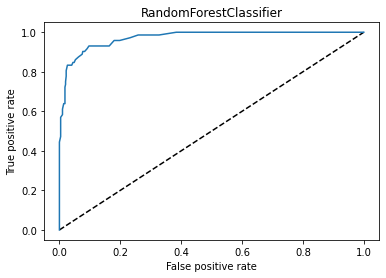

0.9927457187098785

In [2823]:
# Checking roc_auc_score for RandomForestClassifier

y_pred_prob = RFC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,RFC.predict_proba(x4_test),multi_class='ovr')
auc_score

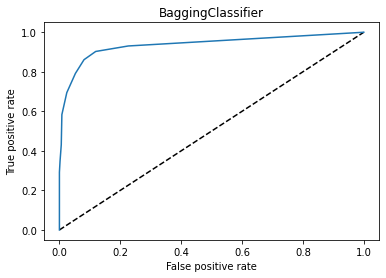

0.9829450518839622

In [2825]:
# Checking roc_auc_score for BaggingClassifier

y_pred_prob = BC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,BC.predict_proba(x4_test),multi_class='ovr')
auc_score

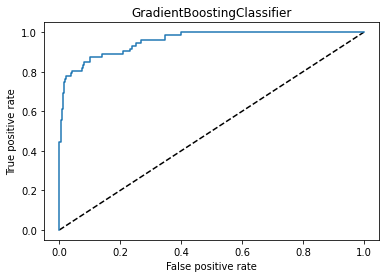

0.9880653060198216

In [2826]:
# Checking roc_auc_score for GradientBoostingClassifier

y_pred_prob = GBC.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,GBC.predict_proba(x4_test),multi_class='ovr')
auc_score

### Observations

Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 93% ,roc_auc_score 99% and Cross validation score of 91% which is good compared with other Models

Let's proceed with Hyper Parameter Tuning to enhance the Model


# Hyper Parameter Tuning

In [2827]:
grid_params={'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5],'min_samples_leaf': [1,2]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x4_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8947598627787308
Best Params {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Final Model Classification

In [2836]:
Final_Model3 = RandomForestClassifier(n_estimators =200, criterion = 'gini',max_depth=50,min_samples_split=2,
                                     min_samples_leaf=1)
                                       
Final_Model3.fit(x4_train,y3_train)
pred3 = Final_Model3.predict(x4_test)
print(Final_Model3.score(x4_train,y3_train))
cr22 = cross_val_score(Final_Model3,x4,y3,cv=5)

print(accuracy_score(y3_test,pred3)*100)
print('CV score of RandomForestClassifier:',cr22.mean()*100)
print(confusion_matrix(y3_test,pred3))
print(classification_report(y3_test,pred3))

1.0
93.12169312169311
CV score of RandomForestClassifier: 91.41832624591245
[[74  0  0  0  0  0  0  1]
 [ 4 50  6  7  3  1  0  1]
 [ 2  0 59  0  0  4  0  0]
 [ 0  1  2 62  0  0  0  0]
 [ 0  2  0  0 70  1  0  0]
 [ 0  1  1  1  0 78  0  0]
 [ 1  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 74]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.93      0.69      0.79        72
           2       0.87      0.91      0.89        65
           3       0.89      0.95      0.92        65
           4       0.96      0.96      0.96        73
           5       0.93      0.96      0.95        81
           6       1.00      0.98      0.99        62
           7       0.97      1.00      0.99        74

    accuracy                           0.93       567
   macro avg       0.93      0.93      0.93       567
weighted avg       0.93      0.93      0.93       567



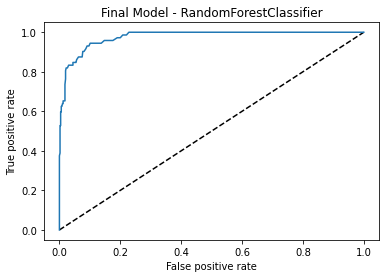

0.9938915171779147

In [2843]:
# Checking roc_auc_score for Final_Model3

y_pred_prob = Final_Model3.predict_proba(x4_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Final Model - RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y3_test,Final_Model3.predict_proba(x4_test),multi_class='ovr')
auc_score

### Observation

Based on Accuracy Score 93% Vs Cross Validation Score 91% Vs AUC_ROC_Curve 99%

Concluding Random Forest Classifier Model is the best fit model for classification to predict the 'primary_fuel' for Global Power Plant dataset

# Saving the Final model - RandomForestClassifier

In [2840]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model3,"Global_pp_fuel.pkl")

['Global_pp_fuel.pkl']

# Predicting the Model

In [2841]:
# Loading the saved model

Model2=joblib.load("Global_pp_fuel.pkl")

#Prediction
prediction2 = Model2.predict(x4_test)
prediction2

array([4, 6, 7, 2, 5, 3, 3, 1, 0, 3, 0, 4, 4, 5, 2, 3, 3, 2, 5, 6, 6, 7,
       3, 2, 4, 1, 0, 3, 6, 5, 0, 6, 2, 7, 5, 3, 3, 7, 3, 1, 7, 5, 5, 0,
       3, 2, 2, 3, 0, 5, 3, 2, 7, 1, 7, 3, 1, 7, 6, 5, 5, 1, 7, 3, 3, 2,
       5, 5, 3, 7, 0, 3, 2, 0, 0, 4, 3, 6, 2, 1, 6, 3, 3, 4, 3, 1, 0, 4,
       4, 7, 4, 7, 2, 3, 2, 2, 1, 2, 1, 7, 5, 0, 3, 0, 0, 5, 3, 4, 3, 3,
       5, 6, 7, 2, 4, 0, 4, 4, 6, 7, 0, 5, 1, 5, 4, 7, 2, 5, 5, 5, 0, 7,
       6, 5, 2, 0, 5, 0, 2, 0, 1, 5, 3, 5, 0, 0, 7, 5, 5, 1, 3, 6, 6, 7,
       6, 0, 5, 0, 4, 0, 3, 3, 2, 3, 7, 4, 4, 2, 3, 7, 7, 6, 5, 5, 0, 6,
       4, 5, 2, 2, 0, 5, 1, 4, 5, 7, 3, 0, 5, 6, 0, 3, 1, 5, 2, 1, 7, 1,
       6, 5, 0, 3, 1, 7, 4, 3, 7, 2, 5, 4, 4, 3, 6, 0, 7, 7, 6, 0, 1, 6,
       3, 0, 7, 6, 2, 7, 7, 4, 6, 5, 5, 5, 2, 5, 5, 0, 1, 0, 7, 0, 0, 1,
       2, 1, 1, 3, 4, 2, 6, 3, 7, 2, 4, 2, 5, 6, 3, 0, 5, 0, 2, 1, 4, 6,
       3, 7, 1, 5, 5, 3, 0, 0, 2, 4, 0, 6, 0, 7, 3, 4, 2, 5, 4, 2, 1, 2,
       2, 2, 2, 4, 1, 5, 3, 6, 7, 7, 7, 0, 3, 4, 5,

In [2842]:
pd.DataFrame([Model2.predict(x4_test)[:],y3_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0            4         4
1            6         6
2            7         7
3            2         2
4            5         5
5            3         3
6            3         3
7            1         1
8            0         1
9            3         3
10           0         0
11           4         4
12           4         4
13           5         5
14           2         2
15           3         3
16           3         3
17           2         2
18           5         5
19           6         6
20           6         6
21           7         7
22           3         3
23           2         2
24           4         4
25           1         1
26           0         0
27           3         1
28           6         6
29           5         5
30           0         0
31           6         6
32           2         1
33           7         7
34           5         2
35           3         3
36           3         1
37           7         7
38           3         3
39           1         1
40           7         7
41           5         5
42           5         5
43           0         0
44           3         3
45           2         3
46           2         2
47           3         3
48           0         0
49           5         5
50           3         3
51           2         2
52           7         7
53           1         1
54           7         7
55           3         3
56           1         1
57           7         7
58           6         6
59           5         5
60           5         2
61           1         1
62           7         7
63           3         1
64           3         3
65           2         2
66           5         5
67           5         5
68           3         3
69           7         7
70           0         0
71           3         3
72           2         2
73           0         0
74           0         0
75           4         4
76           3         3
77           6         6
78           2         2
79           1         1
80           6         6
81           3         3
82           3         1
83           4         4
84           3         3
85           1         1
86           0         0
87           4         4
88           4         4
89           7         7
90           4         4
91           7         7
92           2         2
93           3         3
94           2         3
95           2         2
96           1         1
97           2         2
98           1         1
99           7         7
100          5         5
101          0         0
102          3         3
103          0         0
104          0         1
105          5         5
106          3         3
107          4         4
108          3         3
109          3         3
110          5         5
111          6         6
112          7         7
113          2         2
114          4         4
115          0         2
116          4         4
117          4         4
118          6         6
119          7         7
120          0         0
121          5         5
122          1         1
123          5         5
124          4         4
125          7         7
126          2         2
127          5         5
128          5         5
129          5         5
130          0         0
131          7         7
132          6         6
133          5         5
134          2         2
135          0         0
136          5         5
137          0         0
138          2         2
139          0         0
140          1         1
141          5         5
142          3         3
143          5         5
144          0         0
145          0         0
146          7         7
147          5         5
148          5         5
149          1         1
150          3         1
151          6         6
152          6         6
153          7         7
154          6         6
155          0         6
156          5         5
157          0         0
158          4         4
159  

# Conclusion For Classification Model

RandomForestClassifier Model which was built on the Global Power Plant dataset to predict the 'primary_fuel' of power plants is 
performing good as we can see, Original Vs Predicted value is same, which shows the developed Model is performing well with the given dataset.

# Final Conclusion

Global Power Plant Dataset contains 907 rows and 27 columns, but when we do the data analysis we can find most of the 
features are with null values, due to which we have dropped most of the features and kept few by replacing null values.

Dataset contains the power plants present in India

With the available dataset we can observe that maximum count of 28 power plants has been commissioned in the year 2015 
followed by 25 power plants in the year 2013 and 23 power plants at 2012.

Power Plants with capacity ranges from 5 to 1000 megawatts are maximum in India 

Power plants which uses Nuclear as primary fuel has the maximum capacity of 975 megawatts to generate electricity 
followed by power plants which uses Coal with 797 megawatts and power plants which uses gas with 364 megawatts of capacity 

We can also observe from 2014 to 2018 power plants which uses Coal and Nuclear produced maximum electricity in India

Before 1980's Hydro powered power plants are maximum in India
After 1980's power plants which uses coal as primary fuel started increasing with larger capacity across the country

More than 50% of the data source are reported by Central Electricity Authority and most of the data were not present
in the dataset.

Data provided may vary if complete details was present in the Global Power Plant Dataset

Finally, 851 rows 8 columns were utilized for building Regression Model to predict 'capacity_mw'

For Classification as the classes were imbalanced, Applied SMOTE technique to balance the Target Variable 
and utilized 1888 rows, 8 columns for building classification Model to predict 'primary_fuel',

Both the Model which was built on the base of the Global Power Plant dataset is predicting good as we can see, 
Original Vs Predicted value is same.

For Regression, RandomForestRegressor is the best fit model to predict 'capacity_mw' with r2_score of 86%
For Classification, RandomForestClassifier is the best fit model to predict 'primary_fuel' with accuracy_score of 93%

Thank you for Providing the opportunity to work on the Global Power Plant Dataset.
